# <center> German Credit data тестовое задание </center>

In [1]:
from __future__ import (absolute_import, division,print_function, unicode_literals)
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


###  Часть 1. Описание набора данных и признаков

In [2]:
data = pd.read_csv('germancredit.csv',na_values="NaN")
data.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


Целевая переменная

In [3]:
y= data['Default']
#del data['Default']

### Часть 2. Первичный анализ признаков

Посмотрим есть ли nan значения и сколько датасет занимает в памяти

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Default            1000 non-null int64
checkingstatus1    1000 non-null object
duration           1000 non-null int64
history            1000 non-null object
purpose            1000 non-null object
amount             1000 non-null int64
savings            1000 non-null object
employ             1000 non-null object
installment        1000 non-null int64
status             1000 non-null object
others             1000 non-null object
residence          1000 non-null int64
property           1000 non-null object
age                1000 non-null int64
otherplans         1000 non-null object
housing            1000 non-null object
cards              1000 non-null int64
job                1000 non-null object
liable             1000 non-null int64
tele               1000 non-null object
foreign            1000 non-null object
dtypes: int64(8), object(13)
memory usage: 113.3+ KB


По типу признака можно предположить, что в датасете присутствуют количественные(int64) признаки, категориальные(object) признаки. Рассмотрим каждую категорию признаков по отдельности. Создадим два списка признаков по которым затем будем формировать отдельные таблицы данных, соответствующие их группам: вещественные и категориальные 

In [5]:
cat_features=data.select_dtypes(include=['object']).columns.values.tolist()
real_features=data.select_dtypes(include=['int64']).columns.values.tolist()[1:] #без целевого признака

In [6]:
real_features

['duration', 'amount', 'installment', 'residence', 'age', 'cards', 'liable']

Чтобы анализировать категориальные переменные заменим некоторые анонимизированные значения  своими реальными из описания датасета

In [7]:
data_cat=data[cat_features]
# Status of existing checking account                
data_cat.replace('A11','...<0 DM',inplace=True)
data_cat.replace('A12','0<=...<200 DM',inplace=True)
data_cat.replace('A13','...>=200 DM',inplace=True)
data_cat.replace('A14','no checking account',inplace=True)
# Credit history
data_cat.replace('A30','no credits taken',inplace=True)
data_cat.replace('A31','all credits at this bank',inplace=True)
data_cat.replace('A32','existing credits paid back duly till now',inplace=True)
data_cat.replace('A33','delay in paying off in the past',inplace=True)
data_cat.replace('A34','critical account',inplace=True)
# Purpose
data_cat.replace('A40','car (new)',inplace=True)
data_cat.replace('A41','car (used)',inplace=True)
data_cat.replace('A42','furniture/equipment',inplace=True)
data_cat.replace('A43','radio/television',inplace=True)
data_cat.replace('A44','domestic appliances',inplace=True)
data_cat.replace('A45','repairs',inplace=True)
data_cat.replace('A46','education',inplace=True)
data_cat.replace('A47','vacation',inplace=True)
data_cat.replace('A48','retraining',inplace=True)
data_cat.replace('A49','business',inplace=True)
data_cat.replace('A410','others',inplace=True)
# Savings account/bonds
data_cat.replace('A61','...<100 DM',inplace=True)
data_cat.replace('A62','100<=...<500 DM',inplace=True)
data_cat.replace('A63','500<=...<1000 DM',inplace=True)
data_cat.replace('A64','...>=1000 DM',inplace=True)
# Present employment since
data_cat.replace('A71','unemployed',inplace=True)
data_cat.replace('A72','...<1 year',inplace=True)
data_cat.replace('A73','1<=...<4 years',inplace=True)
data_cat.replace('A74','4<=...<7 years',inplace=True)
data_cat.replace('A75','...>= 7 years',inplace=True)
# Personal status and sex
data_cat.replace('A91','male:divorced/separated',inplace=True)
data_cat.replace('A92','female:divorced/separated/married',inplace=True) # female:single ?
data_cat.replace('A93','male:single',inplace=True) # female:single ?
data_cat.replace('A94','male:married/widowed',inplace=True)
data_cat.replace('A95','female:single',inplace=True)
# Property
data_cat.replace('A121','building society savings agreement',inplace=True)
data_cat.replace('A122','insurance',inplace=True)
data_cat.replace('A123','car or other,not in attribute ',inplace=True)
data_cat.replace('A124','unknown/no property',inplace=True)
# Job
data_cat.replace('A171','unemployed/unskilled - non-resident',inplace=True)
data_cat.replace('A172','unskilled - resident',inplace=True)
data_cat.replace('A173','skilled employee / official',inplace=True)
data_cat.replace('A174','management/ self-employed/highly qualified employee/',inplace=True)

Посмотрим статистику по всем категориальным и количественным признакам

In [8]:
data_cat.describe(include='all').T

,count,unique,top,freq
checkingstatus1,1000,4,no checking account,394
history,1000,5,existing credits paid back duly till now,530
purpose,1000,10,radio/television,280
savings,1000,5,...<100 DM,603
employ,1000,5,1<=...<4 years,339
status,1000,4,male:single,548
others,1000,3,A101,907
property,1000,4,"car or other,not in attribute",332
otherplans,1000,3,A143,814
housing,1000,3,A152,713


Расшифруем отдельно top анонимизированных в датасете значений категориальных переменных

In [9]:
data[real_features].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
cards,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
liable,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


На этапе первичного анализа признаков наиболее интересны столбцы min и max, чобы посмотреть в каких признаках могут быть сильные выбросы. На текущий момент нужно дополнительно проанализировать следующие признаки на предмет выбросов:

duration,amount,age  - как содержащие достаточно большие значения относительно своих средних

Удалять выбросы будем после первичного визуального анализа признаков

###  Часть 3. Первичный визуальный анализ признаков

Посмотрим как распределены значения категориальных признаков 

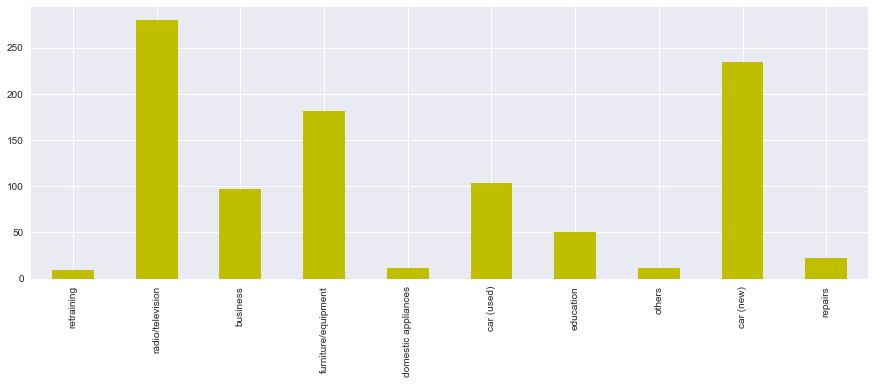

In [10]:
data_cat['purpose'].value_counts(sort=False,dropna=False).plot(kind='bar',figsize=(15, 5),color='y');

100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 14.09it/s]


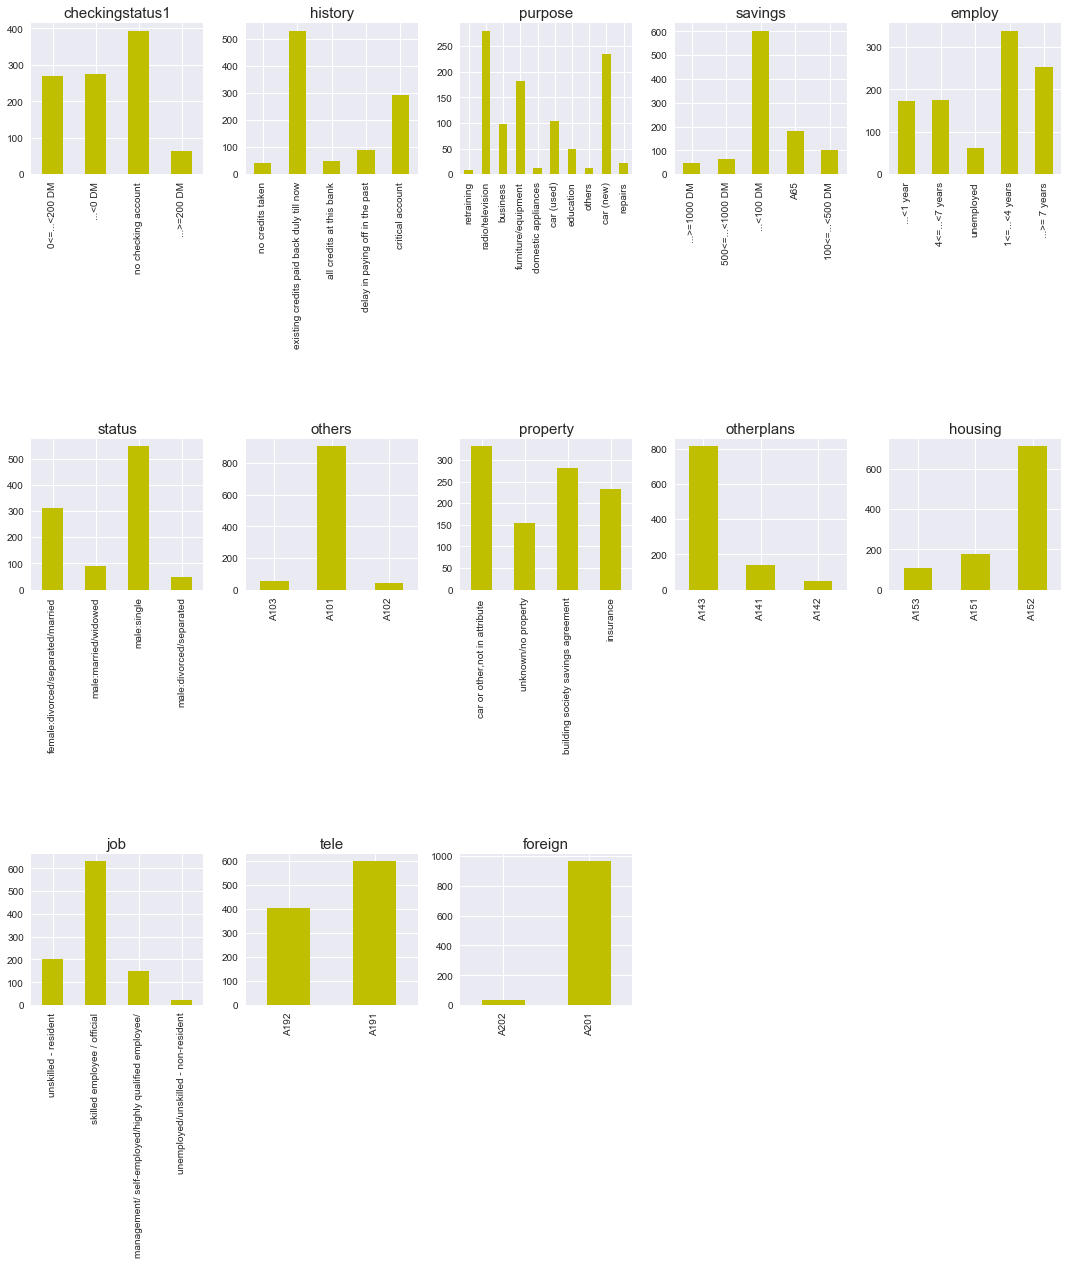

In [11]:
from tqdm import tqdm # pip install tqdm – замер времени выполнения итераций цикла
k=1
for features in tqdm(cat_features):
    plt.figure(1,figsize=(15,20))    
    plt.subplot(4,5,k)
    data_cat[features].value_counts(sort=False).plot(kind='bar',color='y');
    plt.title(features,fontdict={'fontsize':15}) 
    k+=1
plt.tight_layout() 
plt.show()

Обратим внимание наличие бинарных категориальных признаков, т.е. категориальных признаков с 2 уникальными значениями -> tele - Telephone, foreign - foreign worker

Рассмотрим распределение числовых признаков

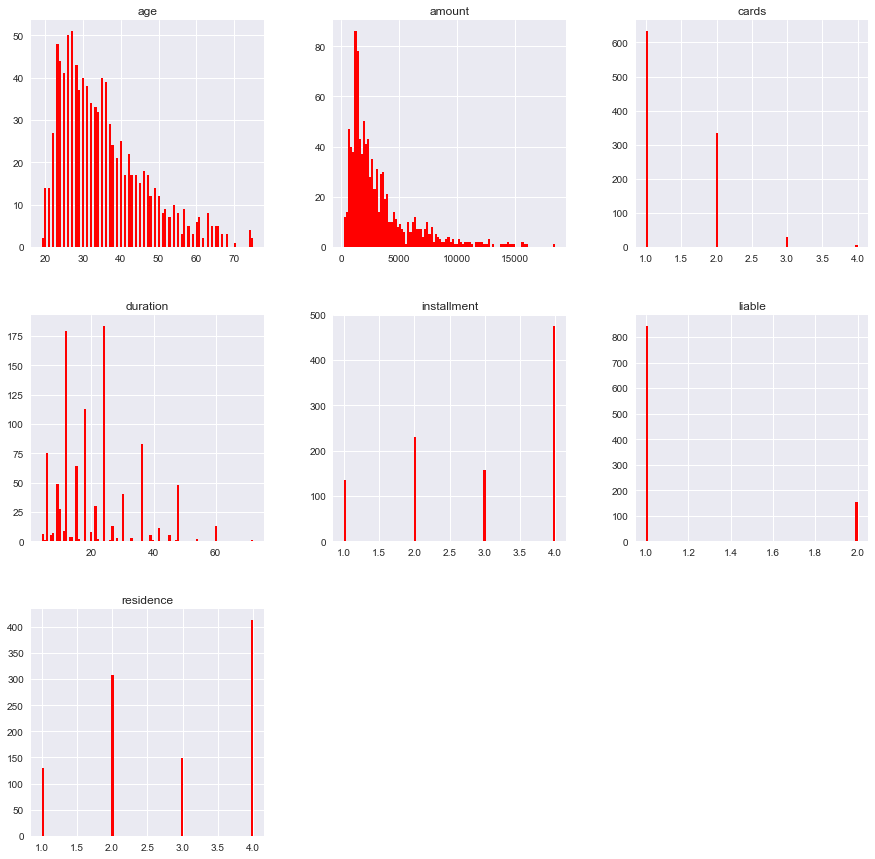

In [12]:
data[real_features].hist(figsize=(15, 15),bins=100,color='r');

Анализируя визуально плотность распеределения относительно средних значений можно обратить внимание на выбросы в данных у следующих признаков -  age > 70 и amount > 15000. Также видно характерное распределение у duration кратное 6 месяцам. Из этой переменной по все видимости в дальнейшем нужно будет сделать несколько новых бинарных признаков.

In [13]:
data['duration'].value_counts()[:10]

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
Name: duration, dtype: int64

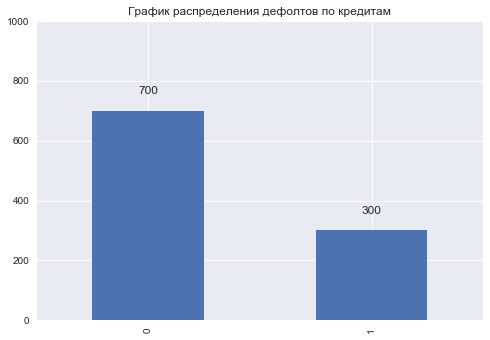

In [14]:
ax=y.value_counts(sort=False).plot(kind='bar');
rects = ax.patches
labels = y.value_counts(sort=False)
figsize(6, 6)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 50, label, ha='center', va='bottom')
    
plt.title(u"График распределения дефолтов по кредитам",fontsize=12);
plt.ylim(0,1000);

Далее расмотрим  соотношение категориальных/вещественных переменных относительно целевой переменной класса.
Будем искать признаки с распределением относительно целевой переменной сильно отличающееся от самого распеределения целевой переменной.

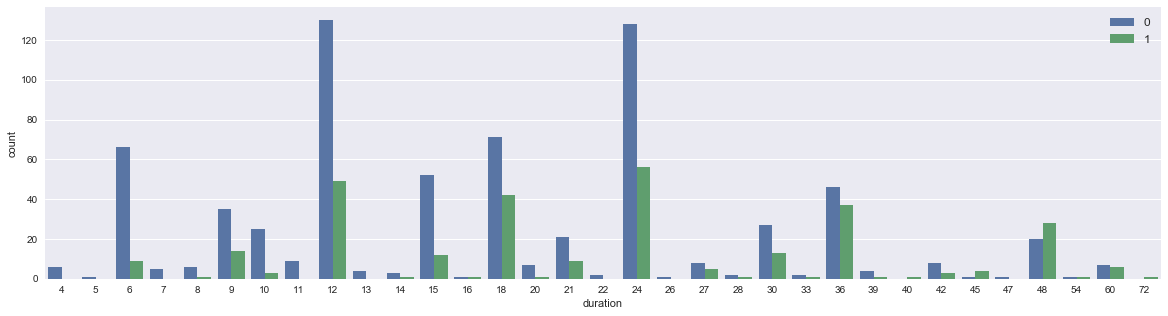

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(x='duration', hue='Default', data=data);
sns.set(font_scale=1.2)
plt.legend(loc='upper right');

При визуальном анализе можно обратить внимание, что начиная с дюрации кредита больше 36 месяцев при условии что эта дюрация кратна 6 месяцам заметно сильно отклонение от общего распределения целевой переменой

100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 14.05it/s]


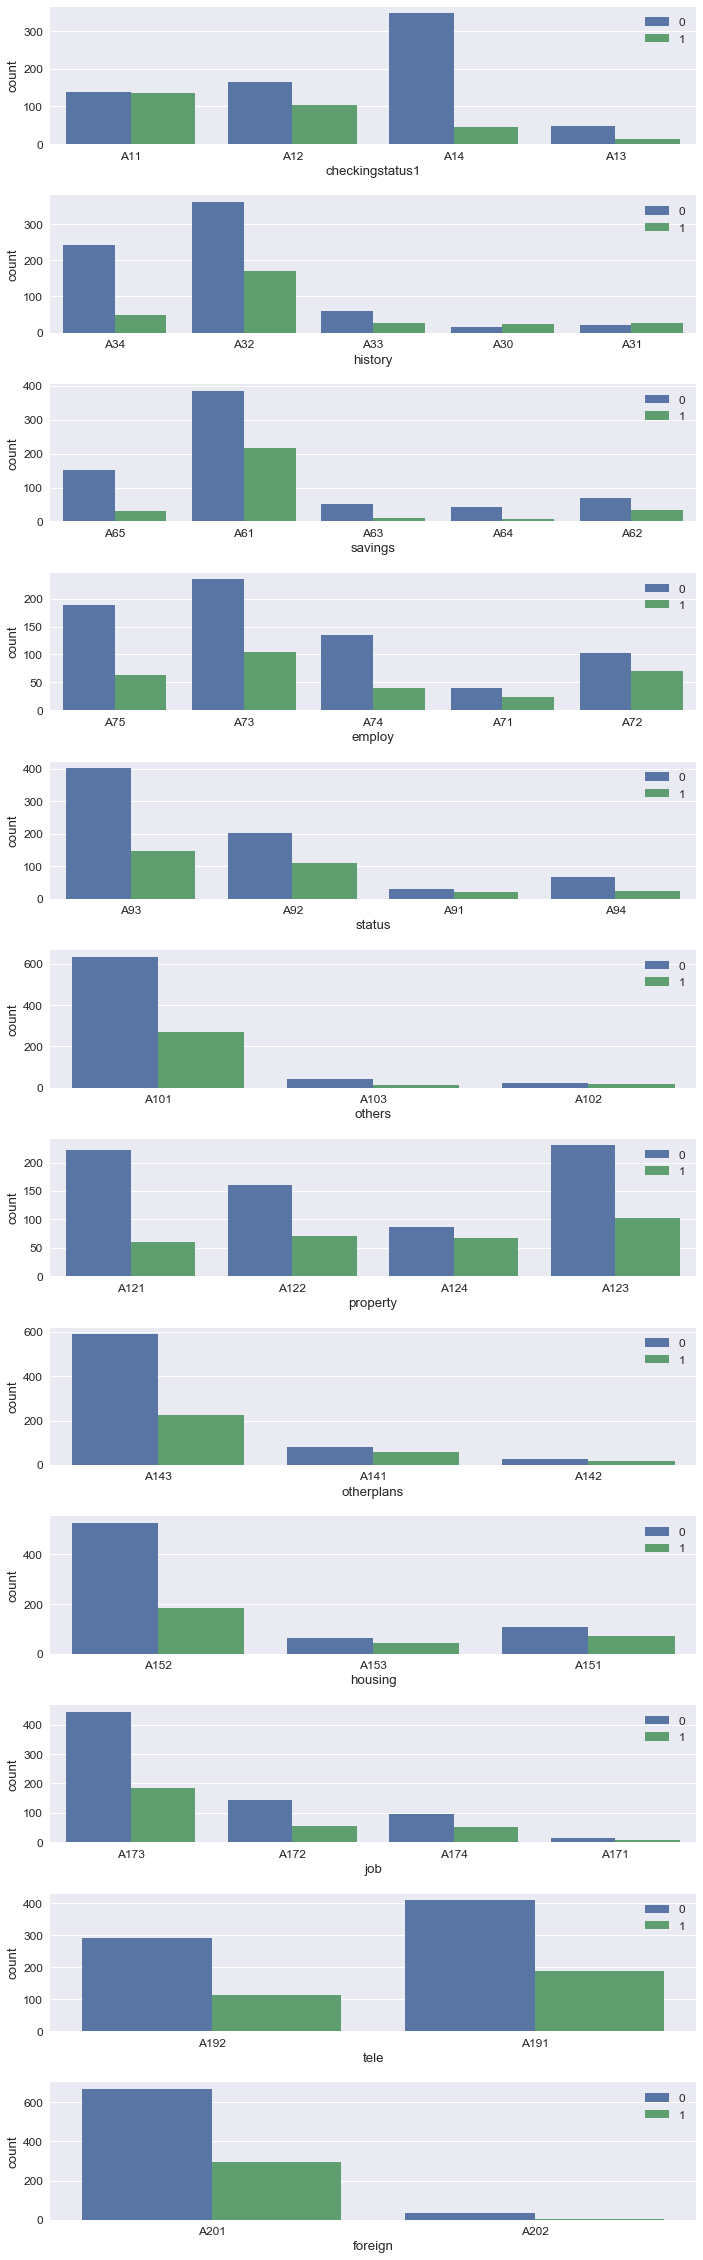

In [16]:
k=1
for features in tqdm(cat_features):
    plt.figure(1,figsize=(10,60))  
    if len(data[features].value_counts())<10: # не будем по второму разу показывать duration     
        plt.subplot(23,1,k)        
        sns.countplot(x=features, hue='Default', data=data);
        sns.set(font_scale=1.2);
        plt.legend(loc='upper right');
        k+=1
plt.tight_layout() 
plt.show()

Также следующие  значения категориальных переменных признаков имеют отличное от распределения целевой переменной 

Визуализируем признаки попарно. Построим scatterplot для пар вещественных признаков. Указать параметр hue = дискретный целевой признак, то разные его значения будут отображаться разными цветами. Удалим пропуски поскольку pairplot не работает с пропусками.

Wall time: 8.6 s


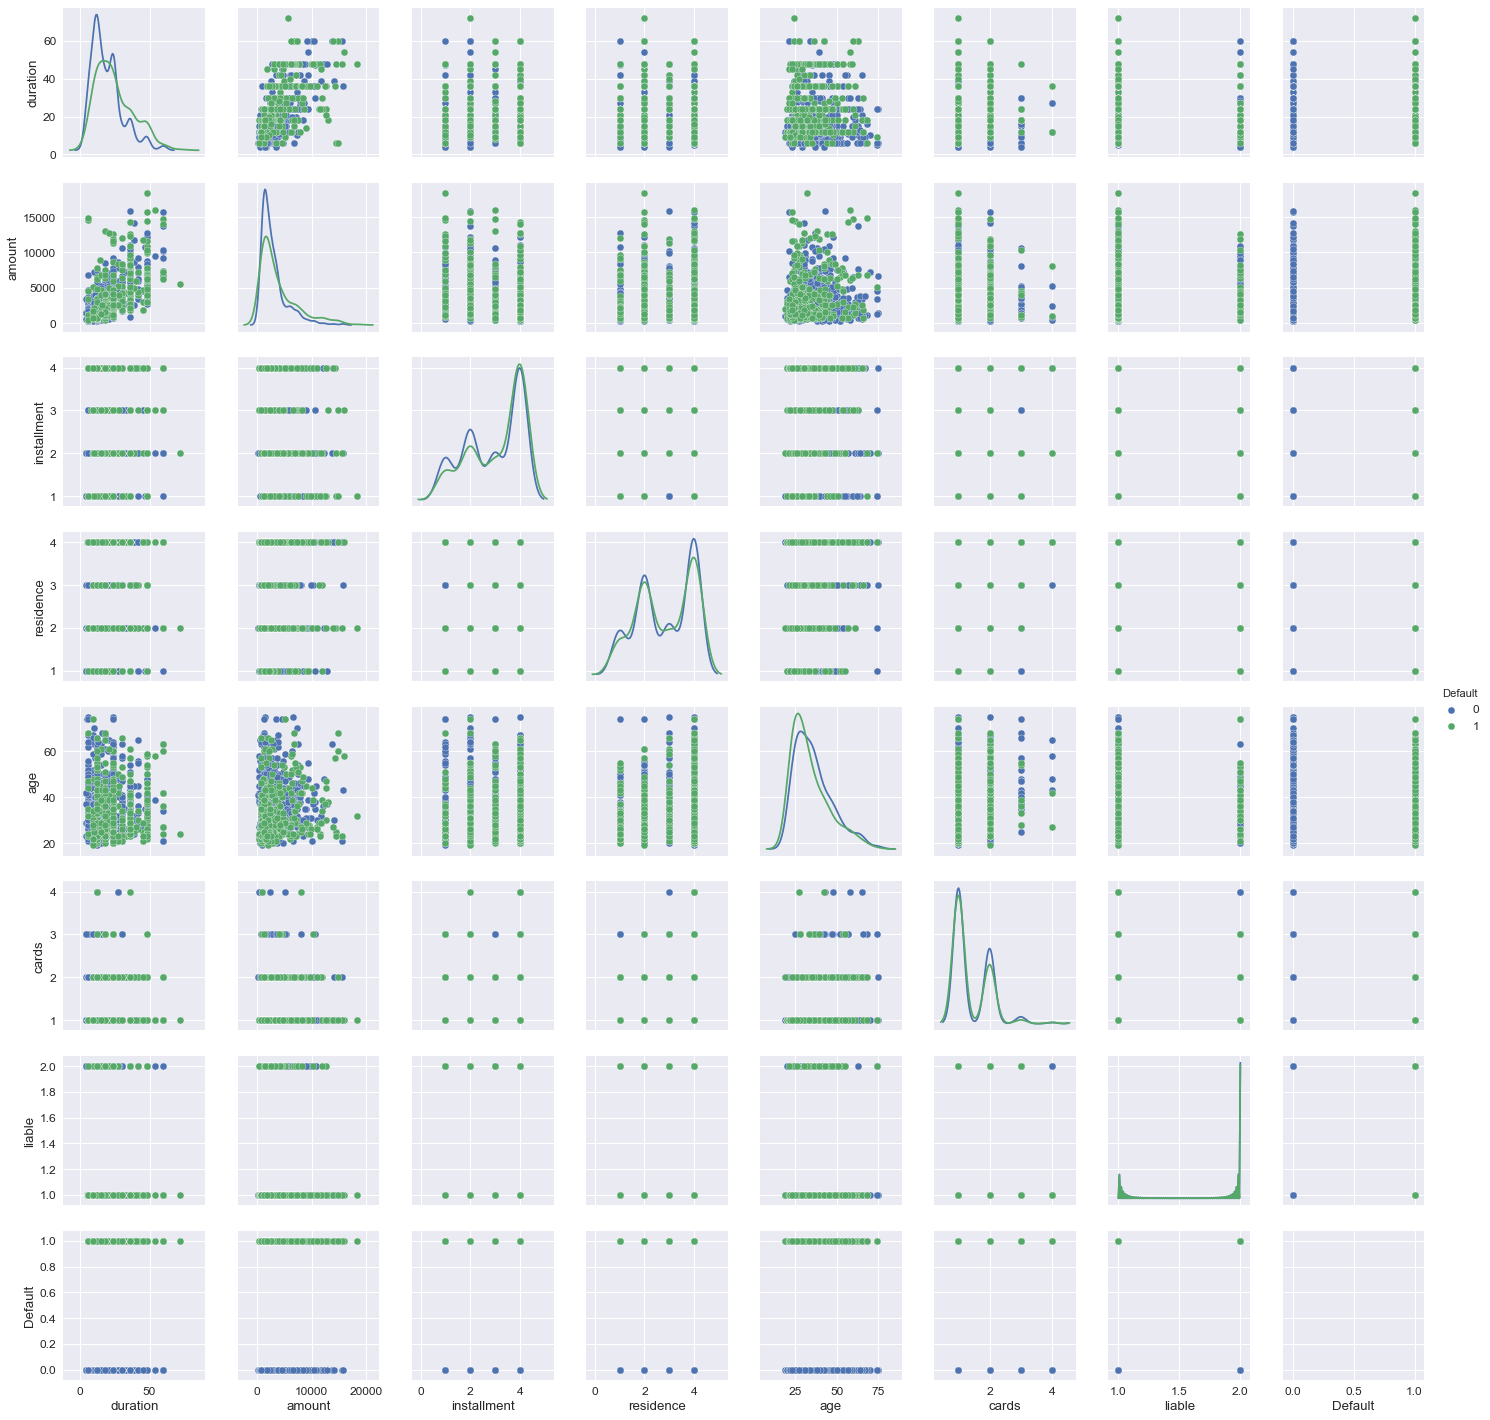

In [17]:
%%time
data_pairplot=pd.concat([data[real_features],data['Default']], axis=1)
data_pairplot.dropna(inplace=True)
sns.pairplot(data_pairplot,diag_kind="kde",hue='Default');

Следует понимать, что pairplot закрашивает область распределения значений последовательно, и последнее значение целевой в переменной будет в 'верхнем слое' рисунка закрашивая собой остальные предшествующие значения целеых переменных у объектов.
Рассмотрим попарные распределения некоторых признаков отдельно 

In [18]:
from matplotlib.colors import ListedColormap
colors=ListedColormap(['b','g'])
def scatter_def(x1,x2):
    sns.pairplot(data,x_vars=[x1],y_vars=[x2],size=6, hue="Default");
    #plt.scatter(data[x1],data[x2],alpha=0.7,c=data['y'],cmap=colors)
    plt.xlabel(x1)
    plt.ylabel(x2)
    plt.xlim(min(data[x1]),max(data[x1]))
    plt.ylim(min(data[x2]),max(data[x2])*1.1) 

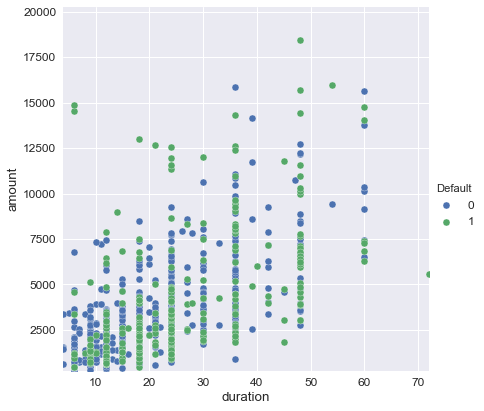

In [19]:
scatter_def('duration','amount')

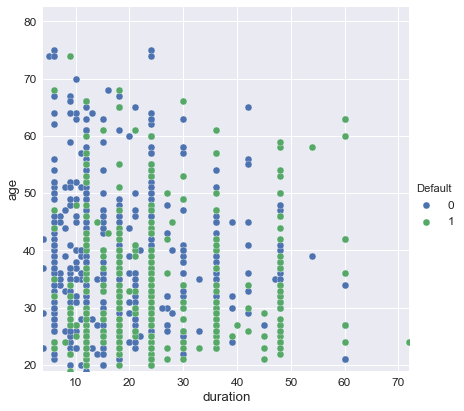

In [20]:
scatter_def('duration','age')

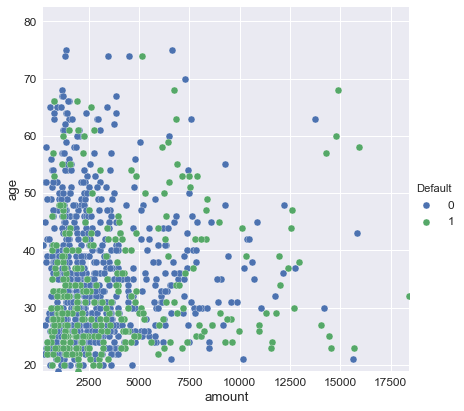

In [21]:
scatter_def('amount','age')

Посмотрим корреляцию Пирсона между количественными признаками

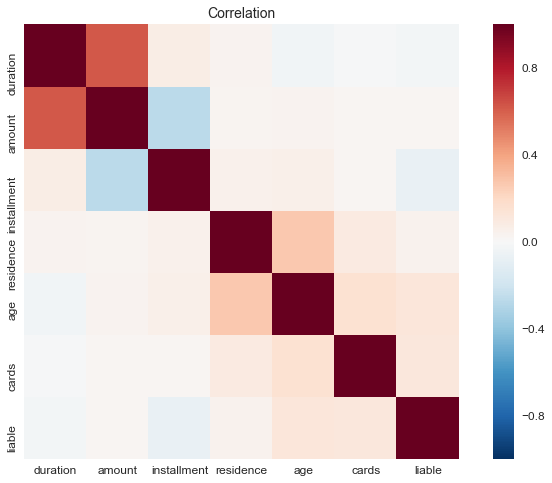

In [22]:
plt.figure(figsize=(12, 8))
plt.title('Correlation',fontsize=14);
# square=True делает квадратной
sns.heatmap(data[real_features].corr(),square=True,cbar=True,cmap='RdBu_r'); # _r значит реверсная карта в цветах

Пары признаков с максимальными коэффициентами корреляции

In [23]:
max_corr=pd.concat([data[real_features].corr().replace(1,0).idxmax(axis=0),\
                     data[real_features].corr().replace(1,0).max(axis=0)], axis=1).reset_index()
max_corr.columns = ['x', 'y','corr']
max_corr_list=max_corr.sort(columns='corr',ascending=False).reset_index(drop=True)[:10].values.tolist()
max_corr[::2].sort(columns='corr',ascending=False).reset_index(drop=True)[:10]
# убираем повторяющиеся через  раз значения -::2
#https://habrahabr.ru/post/207988/

,x,y,corr
0,duration,amount,0.624984
1,age,residence,0.266419
2,liable,age,0.118201
3,installment,duration,0.074749


In [24]:
max_corr=pd.concat([data[real_features].corr().replace(1,0).idxmin(axis=0),\
                     data[real_features].corr().replace(1,0).min(axis=0)], axis=1).reset_index()
max_corr.columns = ['x', 'y','corr']
max_corr_list=max_corr.sort(columns='corr',ascending=False).reset_index(drop=True)[:10].values.tolist()
max_corr[::2].sort(columns='corr',ascending=False).reset_index(drop=True)[:10]

,x,y,corr
0,duration,age,-0.036136
1,age,duration,-0.036136
2,liable,installment,-0.071207
3,installment,amount,-0.271316


####  Предобработка данных - категориальных признаков

Для того чтобы рассмотреть визуально папарные распределения категориальных переменных необходимо предобработать пропуски, поскольку plt.imshow не работает с Nan. Поскольку в текущем датасете нет пропусков - пропускаем этот шаг.
Категориальные переменные будут раскладываться в дамми-переменные, чтобы не засорять датасет большим количеством дамми- переменных нужно уменьшить количество уникальных переменных объединив их в одну. Критерием объединения обычно выберают минимальную долю целевой переменной, все категоральные переменные доля которых меньше минимальной доли одного из значений целевой переменной будут записаны в одну - 'Rare'. В текущем случаю максимальное количество уникальных значений в категориальнй переменной purpose, равняется 10. Этого не такое большое згначение чтобы сворачивать редкие переменные в  'Rare'.

Посмотрим теперь попарные распределения категориальных признаков

In [25]:
def cat_imshow(x,y,data):
    crosstab_fd=pd.crosstab(data[y], data[x])
    # применили ко всей таблице сопряженности логаримф чтобы лучше отобразить imshow, 
    # иначе большая разница между мин и макс
    crosstab_fd_log=crosstab_fd.applymap(lambda x: 0 if x==0 else log(x))
    plt.figure( figsize=(12,6))
    plt.imshow(crosstab_fd_log,cmap='seismic',interpolation='none');
    plt.yticks(range(len(set(data[y]))),[n for n in sorted(set(data[y]))]) # сохраняем порядок
    plt.xticks(range(len(set(data[x]))),[n for n in sorted(set(data[x]))],rotation='vertical')
    plt.ylabel(y,fontsize=15)
    plt.xlabel(x,fontsize=15)
    plt.title(u"Распределение категориальных признаков",fontsize=15)
    plt.grid();
    max_count=pd.concat([crosstab_fd.idxmax(axis=0),crosstab_fd.max(axis=0)], axis=1).reset_index()
    max_count.columns = [x, y,'count']
    display(max_count.sort(columns='count',ascending=False).reset_index(drop=True).head())

,purpose,history,count
0,radio/television,existing credits paid back duly till now,167
1,car (new),existing credits paid back duly till now,120
2,furniture/equipment,existing credits paid back duly till now,106
3,car (used),existing credits paid back duly till now,51
4,business,existing credits paid back duly till now,33


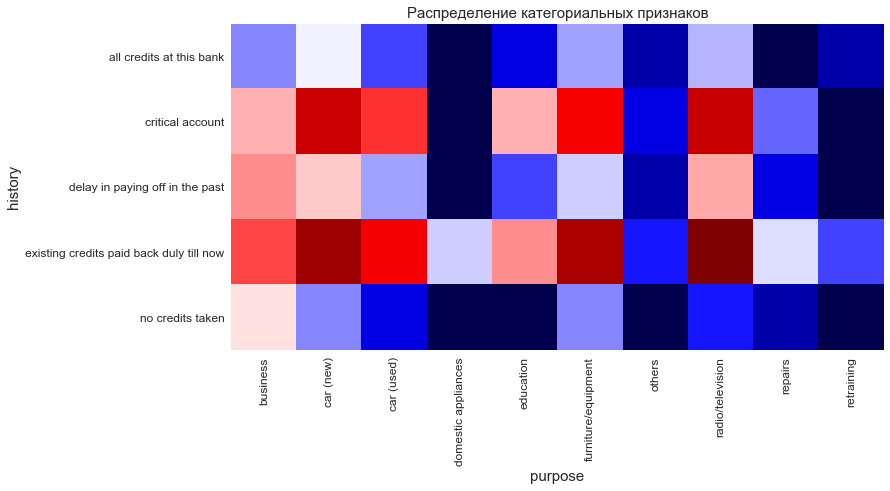

In [26]:
cat_imshow('purpose','history',data_cat)

,purpose,employ,count
0,radio/television,1<=...<4 years,97
1,car (new),1<=...<4 years,76
2,furniture/equipment,1<=...<4 years,65
3,business,1<=...<4 years,36
4,car (used),...>= 7 years,34


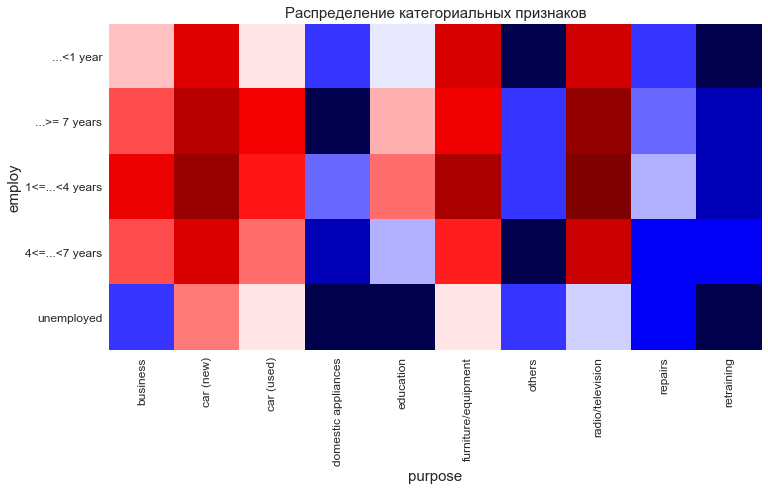

In [27]:
cat_imshow('purpose','employ',data_cat)

,purpose,status,count
0,radio/television,male:single,146
1,car (new),male:single,134
2,furniture/equipment,male:single,85
3,car (used),male:single,70
4,business,male:single,59


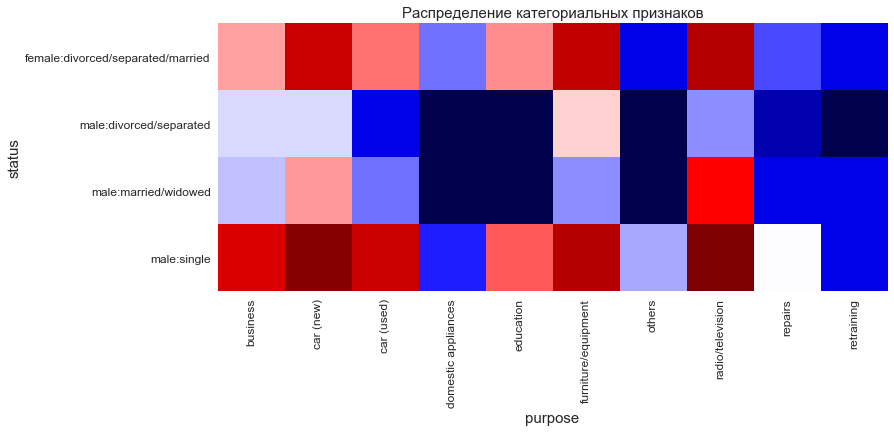

In [28]:
cat_imshow('purpose','status',data_cat)

,purpose,savings,count
0,radio/television,...<100 DM,169
1,car (new),...<100 DM,138
2,furniture/equipment,...<100 DM,128
3,business,...<100 DM,56
4,car (used),...<100 DM,50


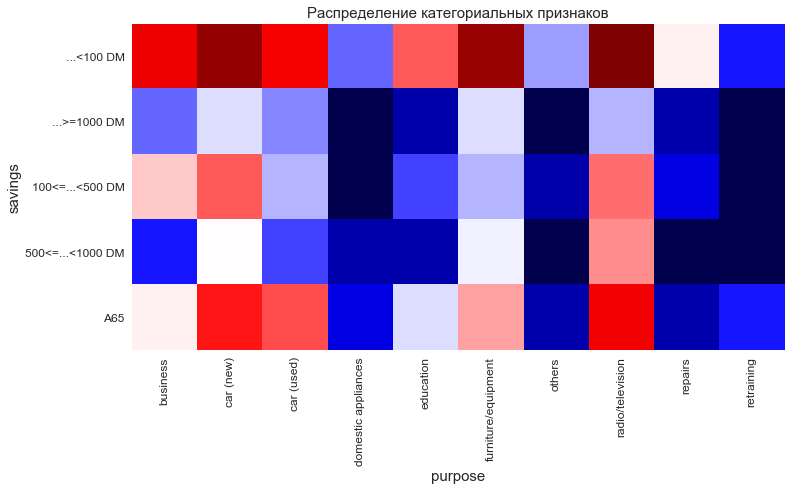

In [29]:
cat_imshow('purpose','savings',data_cat)

,purpose,job,count
0,radio/television,skilled employee / official,195
1,car (new),skilled employee / official,130
2,furniture/equipment,skilled employee / official,126
3,business,skilled employee / official,60
4,car (used),skilled employee / official,60


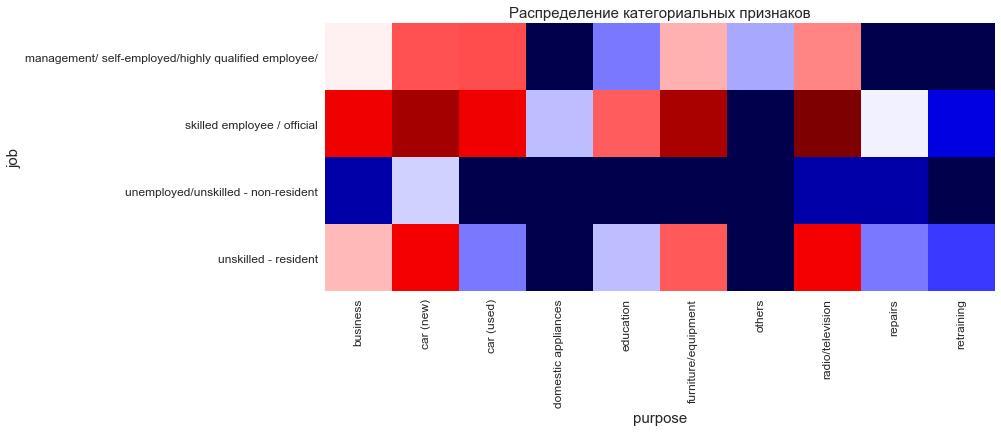

In [30]:
cat_imshow('purpose','job',data_cat)

Заметно что некоторые комбинации переменных категориальных признаков имеют довольно неплохую попарную частоту встречаемости в датасете (count). Будем использовать эти знания при создании новых признаков

Преобразуем категориальные признаки в dummies переменные для работы с scikit learn

In [31]:
data_cat=pd.get_dummies(data[cat_features])
data_cat.shape

(1000, 54)

In [32]:
cat_features_=list(data_cat.columns)

###  Часть 4. Закономерности, "инсайты", особенности данных

Начиная с дюрации кредита больше 36 месяцев при условии что эта дюрация кратна 6 месяцам заметно сильно отклонение от общего распределения целевой переменой. Значения категориальных переменных признаков указанные ниже имеют отличное от распределения целевой переменной 

Для тех комбинаций категориальных признаков которые встречаются в датасете более чем 10% от размера всего датасета, будем создавать отдельные признаки - ассоциативные правила

###  Часть 5. Предобработка данных 

Проанализируем выборку на наличие выбросов. Анализировать будем датасет без категориальных признаков. Удаление выбросов необходимо для корректного обучения датасета. Разобьем выборку на обучающую и отложенную на которой будем проверять качество моделей обучения.

In [33]:
# data=data.drop('Default',axis=1) # раньше целевая переменная нужна была в одном датасете для отрисовки hue
X_train=data[:700]
X_test=data[700:]

y_train=y[:700]
y_test=y[700:]

Посмотрим распределение классов в обучающей и отложенной подвыборках целевого признака

In [34]:
y_train.value_counts()/len(y_train)

0    0.704286
1    0.295714
Name: Default, dtype: float64

In [35]:
y_test.value_counts()/len(y_test)

0    0.69
1    0.31
Name: Default, dtype: float64

In [36]:
from sklearn import svm
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Зададим процент "выбросов". Ищем 1% выбросов в данных, т.е. приблизительно 500 объектов выборки. (Переменные в Python, записанные в верхнем регистре, символизируют константы и обычно записываются в начале файла после подключения модулей).

In [37]:
OUTLIER_FRACTION = 0.01

Масштабируем данные. Выделяем в них две главные компоненты

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# ищем выбросы только у количественных переменных
data_outliers = scaler.fit_transform(X_train[real_features])
data_PCA = PCA(n_components=2).fit_transform(data_outliers)

Для обнаружения «выбросов» в данных используем одноклассовую машину опорных векторов. Создаем SVM классификатор с гауссовым ядром. "Скармливаем" ему данные.

In [39]:
svm_clf = svm.OneClassSVM(kernel="rbf",verbose=1)
svm_clf.fit(data_PCA)

[LibSVM]

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=1)

In [40]:
dist_to_border = svm_clf.decision_function(data_PCA).ravel() # ravel() делает массив плоским
threshold = stats.scoreatpercentile(dist_to_border,
            100 * OUTLIER_FRACTION)
is_outlier = dist_to_border < threshold

In [41]:
import pickle
with open('is_outlier.pkl', 'wb') as fp:
    pickle.dump(is_outlier, fp)

Визуализация

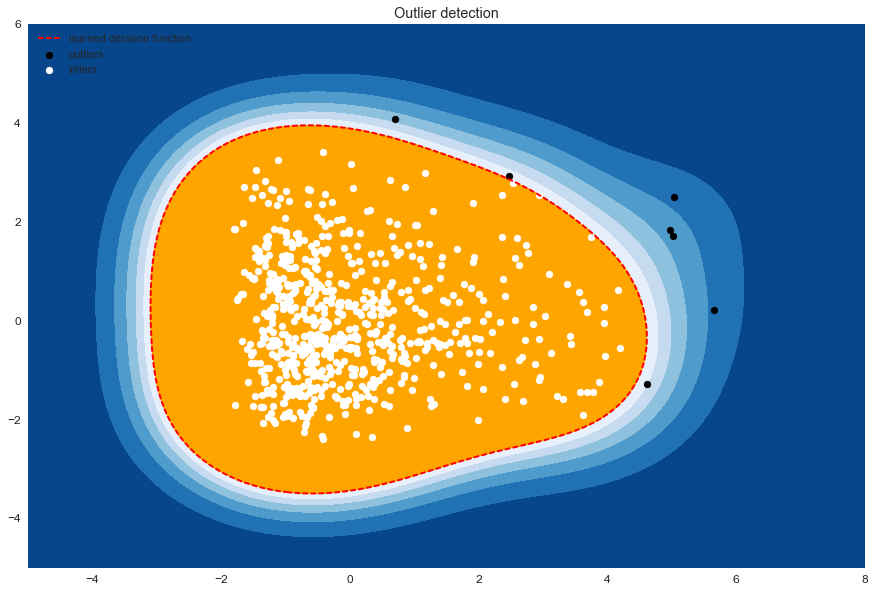

In [42]:
data_outliers_num = data_outliers.shape[0]
xx, yy = np.meshgrid(np.linspace(-10, 15, 500), np.linspace(-10, 10, 500))
n_inliers = int((1. - OUTLIER_FRACTION) * data_outliers_num)
n_outliers = int(OUTLIER_FRACTION * data_outliers_num)
Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15,10))
plt.title("Outlier detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
b = plt.scatter(data_PCA[is_outlier, 0], data_PCA[is_outlier, 1], c='black')
c = plt.scatter(data_PCA[is_outlier == 0, 0], data_PCA[is_outlier == 0, 1], c='white')
plt.axis('tight')
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'outliers', 'inliers'],
           prop=matplotlib.font_manager.FontProperties(size=11),loc='upper left')

plt.xlim((-5, 8))
plt.ylim((-5, 6));

Выбросы ищутся только для тренировочной части выборки, чтобы корректно обучить модель.

Посмотрим как распределен целевой признак для выбросов

In [43]:
y_train[is_outlier].value_counts()/len(y_train[is_outlier])

1    0.571429
0    0.428571
Name: Default, dtype: float64

Заметно, что выбросами больше определяются объекты относящиеся к классу с целевой меткой 1. С ростом OUTLIER_FRACTION эта пропорция выравнивается в сторону распределения меток класса по всей выборке

In [44]:
# НЕ СДЕЛАНО
# Расчитаем корреляцию между категориальными переменными и категориальных с целевой переменной.
# Корреляции Мэтьса / Крамера 

Продолжим анализ числовых признаков. Найденные объекты-выбросы удалим после того как обработаем 'значения выбросы'.
На этапе первичного визуального анализа было решено дополнительно проанализировать следующие признаки на предмет выбросов:   age > 70 и amount > 15000

In [45]:
max_real=data[['age','amount']].describe(include='all').T['max']
max_real

age          75.0
amount    18424.0
Name: max, dtype: float64

Посмотрим сколько раз встречаются значения для признаков age и amount на правом хвосте распределения

In [46]:
result= pd.DataFrame() #creates a new dataframe that's empty

for col in max_real[max_real>1][:10].index:
    d=data[col][data[col]>1].value_counts(dropna=False).reset_index()
    d.columns = ['v_'+col, 'c_'+col] # v-value, c-count
    d.sort(['v_'+col],ascending=False,inplace=True)#.reset_index(drop=True)
    d.reset_index(drop=True,inplace=True)
        
    result = pd.concat([result,d[:10]], axis=1)    
result  

,v_age,c_age,v_amount,c_amount
0,75,2,18424,1
1,74,4,15945,1
2,70,1,15857,1
3,68,3,15672,1
4,67,3,15653,1
5,66,5,14896,1
6,65,5,14782,1
7,64,5,14555,1
8,63,8,14421,1
9,62,2,14318,1


Заменим значения в признаках

In [47]:
data.loc[data['age']>70, 'age']=70
data.loc[data['amount']>15000,'amount']=15000

###  Часть 6. Построение признаков

####  Построение числовых признаков 

Среди числовых признаков есть признаки с перекосом распределения в сторону какого-то одного значения возможно, стоит прологарифмировать при решении задачи - age, amount. Добавим прологорифмированные признаки как отдельные.

In [48]:
data_new_real=pd.DataFrame()
data_new_real['age_ln']= data['age'].apply(lambda x: np.log1p(x))
data_new_real['amount_ln']=data['amount'].apply(lambda x: np.log1p(x))

Сравним распределения 'старых' и новых 'отлогорифмированных' признаков

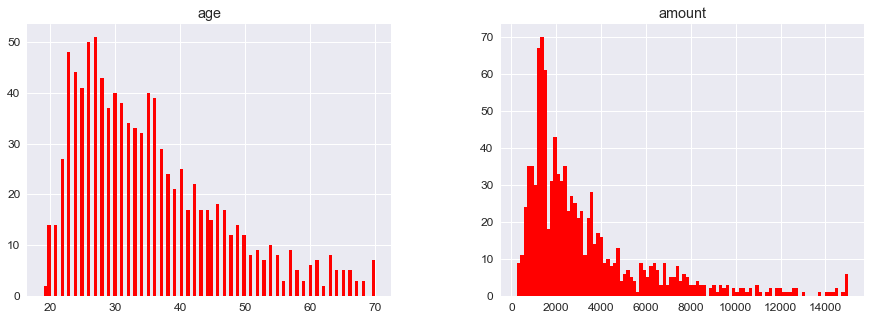

In [49]:
data[['age','amount']].hist(figsize=(15, 5),bins=100,color='r');

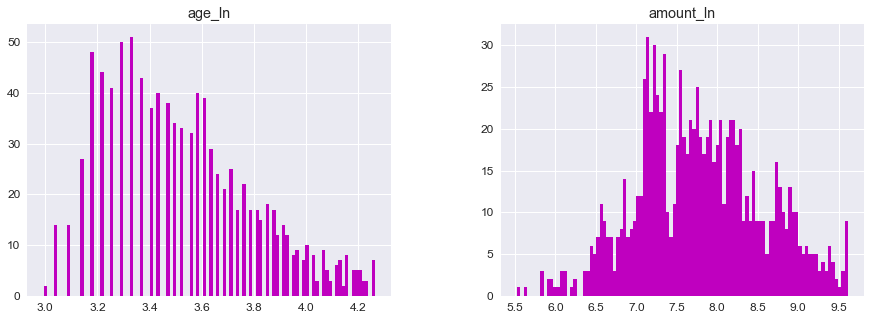

In [50]:
data_new_real[['age_ln','amount_ln']].hist(figsize=(15, 5),bins=100,color='m');

Разобьем признак duration на несколько бинарных признаков, которые будут отражать является ли дюрация равной 6,12,18,24,30,36,42,48,54,60 месяцам - по всей видимости этот ряд отражает стандартные сроки выдачи кредита предлагаемые банком

In [51]:
data_new_real['dur_6']  = data['duration'].apply(lambda x: 1 if x==6 else 0)
data_new_real['dur_12'] = data['duration'].apply(lambda x: 1 if x==12 else 0)
data_new_real['dur_18'] = data['duration'].apply(lambda x: 1 if x==18 else 0)
data_new_real['dur_24'] = data['duration'].apply(lambda x: 1 if x==24 else 0)
data_new_real['dur_30'] = data['duration'].apply(lambda x: 1 if x==30 else 0)
data_new_real['dur_36'] = data['duration'].apply(lambda x: 1 if x==36 else 0)
data_new_real['dur_42'] = data['duration'].apply(lambda x: 1 if x==42 else 0)
data_new_real['dur_48'] = data['duration'].apply(lambda x: 1 if x==48 else 0)
data_new_real['dur_54'] = data['duration'].apply(lambda x: 1 if x==54 else 0)
data_new_real['dur_60'] = data['duration'].apply(lambda x: 1 if x==60 else 0)

#### Построение категориальных признаков

In [52]:
# https://alexanderdyakonov.wordpress.com/2016/08/03/python-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8/

Посмотрим сколько новых признаков добавится, если генерить новый признак как признак явлющийся конъюнкцией двух категориальных признаков — это признак, значениями которого являются пары (значение первого признака, значение второго признака)

In [53]:
from itertools import combinations
comb=list(combinations(cat_features, 2))

In [54]:
comb[:10]

[('checkingstatus1', 'history'),
 ('checkingstatus1', 'purpose'),
 ('checkingstatus1', 'savings'),
 ('checkingstatus1', 'employ'),
 ('checkingstatus1', 'status'),
 ('checkingstatus1', 'others'),
 ('checkingstatus1', 'property'),
 ('checkingstatus1', 'otherplans'),
 ('checkingstatus1', 'housing'),
 ('checkingstatus1', 'job')]

In [55]:
len(comb)

78

In [56]:
# создадим новый DataFrame для этих признаков
data_cat_conj=pd.DataFrame()

for col in combinations(cat_features, 2):
    new_col=col[0]+'+'+col[1]
    data_cat_conj[new_col]=data[col[0]].astype(str)+' + '\
                          +data[col[1]].astype(str) 
    
    # если применить потом pd.get_dummies(data_cat_conj) то таблица сильно разрастется
    # поэтому сделаем также как выше 'упорядоченным'  LabelEncoder    
    #data_cat_conj[new_col] = data_cat_conj[new_col].map(data_cat_conj[new_col].value_counts()).rank(method = 'dense') 
        
data_cat_conj.shape 

(1000, 78)

In [57]:
rank_pairs_cat=pd.Series(data_cat_conj.values.flatten()).value_counts().rank(method = 'dense')

In [58]:
rank_pairs_cat[:10]

A101 + A201    253.0
A143 + A201    252.0
A101 + A143    251.0
A152 + A201    250.0
A101 + A152    249.0
A173 + A201    248.0
A61 + A201     247.0
A143 + A152    246.0
A101 + A173    245.0
A191 + A201    244.0
dtype: float64

In [59]:
for col in data_cat_conj:
    data_cat_conj[col] = data_cat_conj[col].map(rank_pairs_cat)         

In [60]:
data_cat_conj.head()

,checkingstatus1+history,checkingstatus1+purpose,checkingstatus1+savings,checkingstatus1+employ,checkingstatus1+status,checkingstatus1+others,checkingstatus1+property,checkingstatus1+otherplans,checkingstatus1+housing,checkingstatus1+job,...,otherplans+housing,otherplans+job,otherplans+tele,otherplans+foreign,housing+job,housing+tele,housing+foreign,job+tele,job+foreign,tele+foreign
0,67.0,54.0,29.0,66.0,133.0,191.0,70.0,181.0,149.0,150.0,...,246.0,241.0,219.0,252.0,235.0,209.0,250.0,193.0,248.0,231.0
1,131.0,74.0,135.0,84.0,85.0,190.0,74.0,179.0,168.0,138.0,...,246.0,241.0,237.0,252.0,235.0,234.0,250.0,230.0,248.0,244.0
2,136.0,20.0,167.0,74.0,187.0,226.0,111.0,221.0,214.0,70.0,...,246.0,137.0,237.0,252.0,137.0,234.0,250.0,148.0,163.0,244.0
3,142.0,72.0,180.0,46.0,133.0,19.0,79.0,181.0,39.0,150.0,...,81.0,241.0,237.0,252.0,63.0,47.0,104.0,230.0,248.0,244.0
4,12.0,77.0,180.0,91.0,133.0,191.0,50.0,181.0,39.0,150.0,...,81.0,241.0,237.0,252.0,63.0,47.0,104.0,230.0,248.0,244.0


Построим корреляцию 'новых' числовых признаков с целевой переменной

duration       0.206597
amount         0.147464
dur_6          0.126631
dur_36         0.123191
dur_48         0.115703
amount_ln      0.101170
age_ln         0.086739
age            0.075775
installment    0.071424
dur_18         0.039605
dtype: float64


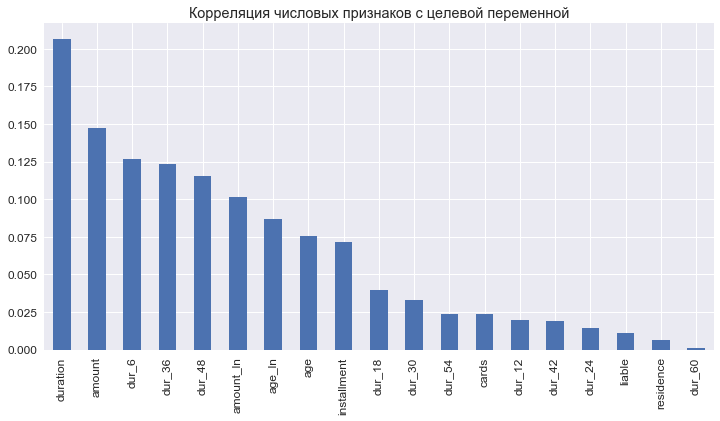

In [61]:
corr_df= np.abs(pd.concat([X_train[real_features],data_new_real[:700]], axis=1)\
                .corrwith(y_train, axis=0, drop=False))\
                .sort_values(ascending=False)
print (corr_df[:10])
corr_df.plot(kind='bar',figsize=(12,6));
plt.title(u"Корреляция числовых признаков с целевой переменной"); 

Построим корреляцию 'новых' числовых признаков друг с другом

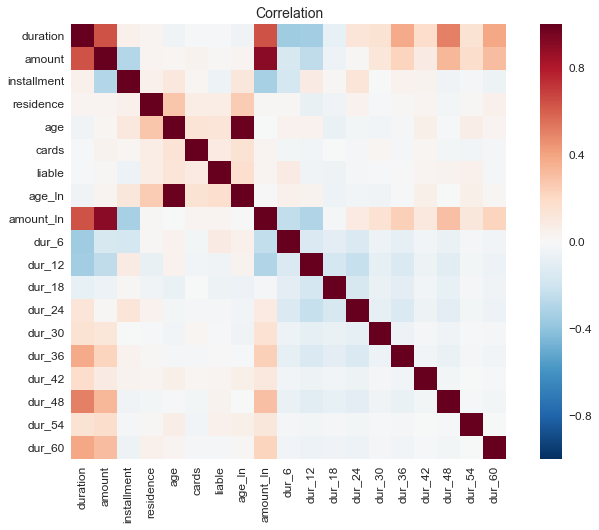

In [62]:
plt.figure(figsize=(12, 8))
plt.title('Correlation',fontsize=14);
# square=True делает квадратной
sns.heatmap(pd.concat([X_train[real_features],data_new_real[:700]], axis=1).corr(),\
            square=True,cbar=True,cmap='RdBu_r');

Применим смешанное кодирование - когда значение категориальной переменной будем кодировать средним значением по каждой уникальной переменной категориального признака.

In [63]:
def means_mapping(data, data_means,real_features, cat_features, func = 'mean'):
    if type(cat_features) != list: # groupby делается по cat_feature который м.б. как один так и несколько признаков
        cat_features = [cat_features]
    name = '{0}_by_{1}_mean'.format(real_features, cat_features)
    grp = data_means.groupby(cat_features)[[real_features]].agg(func)
    grp.columns = [name]
    # для каждой уникальной переменной будем мапить её среднее значение числового признака полученного через groupby
    return pd.merge(data[cat_features], grp, left_on = cat_features, right_index = True, how = 'left')[name]

Для каждой категориальной переменной с количеством уникальных значений больше 3 применим смешанное кодирование средним значением 5 лучших с точки зрения корреляции с целевым признаком, числовых переменных.

In [64]:
# https://github.com/btbpanda/Tinkoff-boosters-2nd-place-/blob/master/lightgbm_new_logloss_4_fs.py#L146
data_means_map=pd.DataFrame()

data_means_=pd.concat([data[cat_features], data[real_features],data_new_real], axis=1) 

for best_real_features in corr_df[:10].index:
    for col_cat_features in cat_features:
        if len(data[col_cat_features ].value_counts())>3:  
            # можно сразу нормировать 
            #data_means_map_= data[best_real_features]/means_mapping(best_real_features, col_cat_features)
            
            data_means_map_= means_mapping(data_means_,data_means_, best_real_features, col_cat_features)            
            data_means_map = pd.concat([data_means_map,data_means_map_], axis=1) 
            
data_means_map.fillna(mean,inplace=True)

In [65]:
data_means_map.head()

,duration_by_['checkingstatus1']_mean,duration_by_['history']_mean,duration_by_['purpose']_mean,duration_by_['savings']_mean,duration_by_['employ']_mean,duration_by_['status']_mean,duration_by_['property']_mean,duration_by_['job']_mean,amount_by_['checkingstatus1']_mean,amount_by_['history']_mean,...,installment_by_['property']_mean,installment_by_['job']_mean,dur_18_by_['checkingstatus1']_mean,dur_18_by_['history']_mean,dur_18_by_['purpose']_mean,dur_18_by_['savings']_mean,dur_18_by_['employ']_mean,dur_18_by_['status']_mean,dur_18_by_['property']_mean,dur_18_by_['job']_mean
0,21.339416,19.488055,20.046429,22.715847,21.264822,22.237226,16.237589,21.411111,3172.091241,3088.037543,...,2.911348,3.009524,0.120438,0.119454,0.121429,0.087432,0.075099,0.094891,0.127660,0.119048
1,22.680297,20.111321,20.046429,20.441128,20.365782,19.438710,16.237589,21.411111,3808.821561,3038.073585,...,2.911348,3.009524,0.126394,0.113208,0.121429,0.137645,0.132743,0.135484,0.127660,0.119048
2,19.954315,19.488055,21.100000,20.441128,22.994253,22.237226,16.237589,16.535000,3131.444162,3088.037543,...,2.911348,2.845000,0.104061,0.119454,0.080000,0.137645,0.080460,0.094891,0.127660,0.090000
3,21.339416,20.111321,19.292818,20.441128,22.994253,22.237226,19.659483,21.411111,3172.091241,3038.073585,...,2.931034,3.009524,0.120438,0.113208,0.160221,0.137645,0.080460,0.094891,0.099138,0.119048
4,21.339416,26.215909,18.504274,20.441128,20.365782,22.237226,26.915584,21.411111,3172.091241,4295.181818,...,3.090909,3.009524,0.120438,0.090909,0.098291,0.137645,0.132743,0.094891,0.090909,0.119048


Поскольку мы строим новый признак на всю первоначальную выборку можно говорить о "слабой утечке данных". По хорошему нужно считать средние только по тестовой выборке и затем уже их "маппить"  на тренировочную и отложенные выборки.

####  Построение новых признаков с использованием целевой переменной

In [66]:
# https://www.youtube.com/watch?v=g335THJxkto
# https://www.slideshare.net/rusbase/icbda15-1-kaggle-icbda2016
# https://www.youtube.com/watch?v=np_KY9NlPuQ
# https://github.com/btbpanda/Tinkoff-boosters-2nd-place-....

In [67]:
# воспользуемся готовым кодом
# https://github.com/btbpanda/Tinkoff-boosters-2nd-place-/blob/master/MeanClassifier.py
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from numpy import random
import shelve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

class MeanClassifier():
    """
    Класс выдает среднюю вероянтность по группе подбирая значение регуляризатора по сетке
    На выходе дает предсказание out-of-fold
    Работает с DataFrame
    Параметры:
        alpha - заданное значение регуляризатора
        grid - стека значений регуляризаторов
        metric - что меряем
    """
    #  здесь зададим metric = roc_auc_score
    def __init__(self, alpha = 1, grid = None, metric = roc_auc_score):
        self.alpha = alpha
        self.grid = grid
        self.metric = metric
        
    def fit_predict(self, df, by, target, cv):
        if type(by) != list:
            by = [by]
        self.by = by
        if self.grid == None:
            grid = [self.alpha]
        else:
            grid = self.grid
        df = df[[target] + by].copy()
        df.index.name = '__id__'
        index = df.index
        df.reset_index(inplace = True)   
        df['_folds'] = cv.test_folds
        df.set_index(by + ['_folds'], inplace = True)
        
        levels = list(range(len(by)))
        levels_all = levels + [len(levels)]
        
        self.prior = df[target].mean()
        prior_fld = df.groupby(level = -1)[target].mean()
        grp = df.groupby(level = levels_all)[target].agg(['sum', 'count']) #.reset_index(level = -1)

        grp_fld = []
        for i in range(len(cv)):
            fold_stats = grp.drop(i, level = -1, axis = 0).groupby(level = levels).sum().reset_index()
            fold_stats['_folds'] = i
            fold_stats.set_index(by + ['_folds'], inplace = True)
            grp_fld.append(fold_stats)
        grp_fld = pd.concat(grp_fld)

        df = df.join(grp_fld)
        df.reset_index(inplace = True)
        df.set_index(index.name, inplace = True)
        prior_fld = df['_folds'].map(prior_fld).values
        df = df.ix[index]
        Y = df[target].values
        sum_target = df['sum'].fillna(0).values
        count_target = df['count'].fillna(0).values
        
        self.scores = []
        best_score = -np.inf
        for i in grid: 
            try:
                X = (sum_target + prior_fld * i) / (count_target + i)
                score = self.metric(Y, X)
            except ValueError:
                score = -np.inf
            if score > best_score:
                self.alpha = i
                best_pred = X
                best_score = score
            self.scores.append(score)
        self.grp = grp.groupby(level = levels).sum()
        
        return best_pred
    
    def predict(self, df):
        res = pd.merge(df[self.by], self.grp, how = 'left', left_on = self.by, right_index = True)[['sum', 'count']].fillna(0)
        return (res['sum'] + self.prior * self.alpha) / (res['count'] + self.alpha) 


Поскольку при построении новых признаков будет использоваться целевая переменная необходимо разбить выборку на тренировочную и тестовую

In [68]:
%%time
# def fit_predict(self, df, by, target, cv)
X_train=data[:700]
X_test=data[700:] 
y_train= y[:700] # смотрим только в целевую переменную из тренировочной выборки

from sklearn.cross_validation import StratifiedKFold
folds = StratifiedKFold(X_train['Default'].values, 5, shuffle = True, random_state = 42)

it_scores = {}
added_inter = 0
data_mean_y = pd.DataFrame()

for i in range(1, 4):
    for j in combinations(cat_features, i):
        by = list(j)
        name = '_'.join(by) + '_it'
        model = MeanClassifier(grid = list(np.arange(20)))

        pred = model.fit_predict(X_train, by, 'Default', cv = folds)
        score = max(model.scores)
        
        
        if i == 1 or score > max([it_scores[x + '_it'] for x in by]):
            data_mean_y[name] = np.hstack((pred, model.predict(X_test).values))
            added_inter += 1
        it_scores[name] = score
        # print(name, score)       

C:\Users\Pavel\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Wall time: 23.4 s


In [69]:
data_mean_y.shape

(1000, 292)

Было сгенерированно достаточно большое количество признаков. Чтобы отобрать необходимые воспользуемся Lasso с  регуляризацией  которая занулит наиболее неинформативные признаки. Оставшиеся признаки добавим в модель.

In [70]:
%%time
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score

_X = data_mean_y.values 
_pred = np.empty_like(y_train)
model = Lasso(.00001, selection = 'random', random_state = 42, max_iter = 1000000, positive = False)

#alpha = 0`` is equivalent to an ordinary least square, solved
#by the :class:`LinearRegression` object. For numerical
#reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
#Given this, you should use the :class:`LinearRegression` object.

#selection = 'random'
#If set to 'random', a random coefficient is updated every iteration
#rather than looping over features sequentially by default. This
#(setting to 'random') often leads to significantly faster convergence
#especially when tol is higher than 1e-4.

# tuning penalty
# Lasso is faster than Logistic
for f0, f1 in folds:
    print('..training')
    model.fit(_X[f0], y_train[f0])
    _pred[f1] = model.predict(_X[f1])
    
print(accuracy_score(y_train, _pred)) 

..training
..training
..training
..training
..training
0.714285714286
Wall time: 31.7 s


In [71]:
model.fit(_X[:len(X_train)], y_train)
interactions_col=[x for x in data_mean_y.columns]
data_mean_y.drop(np.array(interactions_col)[model.coef_ == 0], axis = 1, inplace = True)
# print('Interactions added {0}'.format(np.array(interactions_col)[model.coef_ != 0]))

In [72]:
data_mean_y.shape

(1000, 271)

В дальнейшем количество признаков будет еще сокращено с помощью методов отбора признаков

### Визуализация с помощью понижения размерности

Воспользуемся средствами понижения размерности. Для задачи с дискретным целевым признаком это позволит понять, какие классы хорошо разделяются, а какие - нет. 
Если методы визуализации хорошо разведут классы, то будем использовать полученные значения х,y как новые признаки.

In [73]:
X_train_viz=pd.concat([data[real_features] ,data_new_real ,data_cat, data_means_map,data_mean_y], axis=1)\
                    [:700][~is_outlier]
X_train_viz.shape

(693, 424)

In [74]:
y_train=y_train[~is_outlier]
print (len(y_train))

693


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_viz)
pca = PCA(n_components=0.9).fit_transform(X_scaled)#будем объяснять 90% выборки
pca.shape

(693, 64)

(-20, 20)

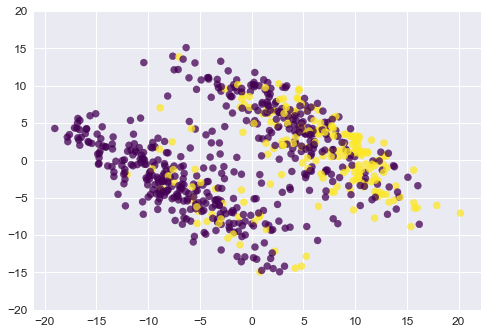

In [76]:
plt.scatter(pca[:, 0], pca[:, 1], c=y_train,  s=50, cmap='viridis',alpha=0.75);
plt.ylim(-20,20)

Будем строить визуализацию методом t-SNE

In [77]:
%%time
from sklearn.manifold import TSNE
import matplotlib.cm as cm # импортируем цветовые схемы, чтобы рисовать графики.
tsne_cos=TSNE(n_components=2,init='random',metric='cosine',random_state=321) 
tsne_representation=tsne_cos.fit_transform(X_train_viz)

Wall time: 4.78 s


Визуализируем полученное представление. Для этого создадим набор цветов по количеству классов, а затем в цикле по классам будем отображать представления точек, относящихся к этому классу. Будем указывать параметр alpha=0.5, чтобы сделать точки полупрозрачными, это лучше в ситуации, когда точки накладываются.

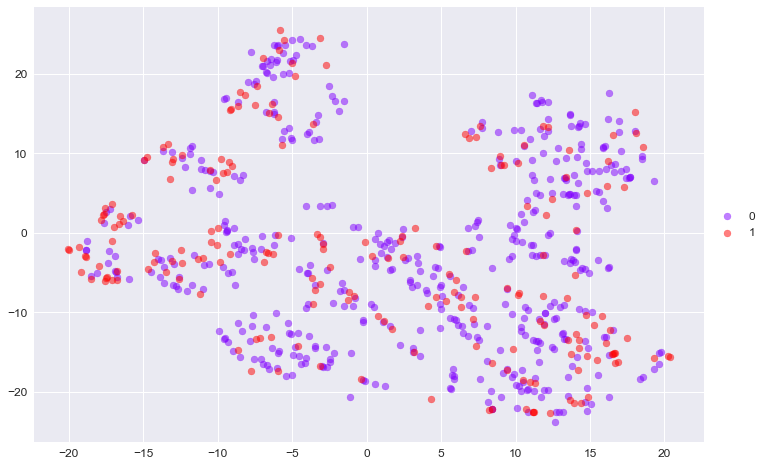

In [78]:
colors = cm.rainbow(np.linspace(0, 1, len(set(y_train))))
plt.figure(figsize=(12,8))
for y, c in zip(set(y_train), colors):
    plt.scatter(tsne_representation[y_train.values==y, 0], 
                tsne_representation[y_train.values==y, 1], c=c, alpha=0.5, label=str(y))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [79]:
del X_train_viz

Не смоторя на то что данные кластеризуются на 3-4 класса, классы целевой переменной при этом не разводятся по этим кластерам. При другом значении random_state=321 класстеризация объектов заметно ухудшается

###  Часть 7. Отбор признаков

Посчитаем общее количество старых и полученных новых признаков.

In [80]:
feature_selection_data=[data[real_features] ,data_new_real ,data_cat, data_cat_conj, data_means_map,data_mean_y]
feature_count=[]
for data_ in feature_selection_data:
    feature_count.append(data_.shape[1])
    
del feature_selection_data #очистим память 
print (feature_count, sum(feature_count))                       

[7, 12, 54, 78, 80, 271] 502


In [81]:
# http://datareview.info/article/otbor-priznakov-dlya-mashinnogo-obucheniya-na-python/

Первоначально отберем признаки используя обученную модель из которой будем брать feature importances. Чтобы не мешать отбор признаков разобьем отбор признаков на основе важности на несколько этапов:

1. отбор категориальных признаков
2. отбор числовых признаков
3. окончательный отбор признаков

 Для категориальных признаков рассмотрим 3 метода отбора признаков на Python

In [82]:
y= data['Default']
y_train = y[:700] # снова перепишем переменную y_train

In [83]:
#from sklearn.ensemble import ExtraTreesClassifier
#model = ExtraTreesClassifier(verbose=1)
from sklearn.ensemble.forest import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000,max_features=25,random_state=17,verbose=1)

In [84]:
data_feature_selection=pd.concat([data_cat,data_cat_conj,data_means_map,data_mean_y], axis=1)[:700] # тренировочная выборка

model.fit(data_feature_selection, y_train)
importances = model.feature_importances_

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.4s finished


483
checkingstatus1_history_savings_it    0.011931
history_savings_others_it             0.009836
checkingstatus1_savings_others_it     0.009465
checkingstatus1_savings_foreign_it    0.009430
checkingstatus1_employ_others_it      0.008534
checkingstatus1_history_others_it     0.008428
checkingstatus1_savings_employ_it     0.008280
checkingstatus1_employ_housing_it     0.007950
checkingstatus1_status_property_it    0.007600
checkingstatus1_savings_it            0.007577
Name: RandomForest, dtype: float64


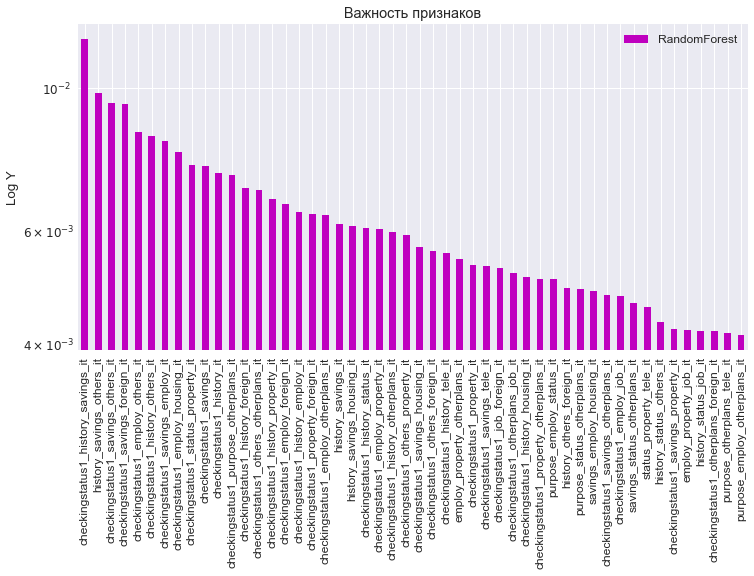

In [85]:
features_cat_df =pd.DataFrame(data=importances, index=list(data_feature_selection.columns), columns=['RandomForest'])
features_cat_df.sort_values(by='RandomForest', ascending=False, inplace=True)
print (features_cat_df.shape[0])
print (features_cat_df['RandomForest'][:10])
features_cat_df[:50].plot(kind='bar',figsize=(12,6),color='m',logy=True) #sort_columns=True
plt.ylabel("Log Y")
plt.title(u"Важность признаков");

In [86]:
features_cat_df[:10]

,RandomForest
checkingstatus1_history_savings_it,0.011931
history_savings_others_it,0.009836
checkingstatus1_savings_others_it,0.009465
checkingstatus1_savings_foreign_it,0.009430
checkingstatus1_employ_others_it,0.008534
checkingstatus1_history_others_it,0.008428
checkingstatus1_savings_employ_it,0.008280
checkingstatus1_employ_housing_it,0.007950
checkingstatus1_status_property_it,0.007600
checkingstatus1_savings_it,0.007577


Отбор признаков в последующих моделях организуем таким отразом, чтобы отобрать 50 наиболее важных признаков

In [87]:
n=50 # число важных признаков

In [88]:
# Chi-squared stats of non-negative features for classification tasks
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(data_feature_selection)

In [89]:
%%time
from sklearn.feature_selection import SelectKBest, chi2 

# feature extraction
model = SelectKBest(score_func=chi2, k=n) # 50 наиболее важных признаков
fit = model.fit(X_scaled, y_train)
#numpy.set_printoptions(precision=3)# три знака при использовании print после запятой

# summarize scores
features_cat_df2 =pd.DataFrame(data=fit.scores_, \
                              index=list(data_feature_selection.columns), columns=['SelectKBest'])
features_cat_df2.sort_values(by='SelectKBest',ascending=False, inplace=True)

Wall time: 15.6 ms


In [90]:
features_cat_df2[:10]

,SelectKBest
checkingstatus1_A14,43.496377
checkingstatus1_it,28.956895
checkingstatus1_others_it,25.776488
checkingstatus1_history_others_it,25.322961
checkingstatus1_savings_foreign_it,24.069000
checkingstatus1_savings_it,23.608515
checkingstatus1_A11,23.432223
checkingstatus1_history_it,22.946400
checkingstatus1_savings_others_it,22.920602
checkingstatus1_property_foreign_it,22.554796


In [91]:
%%time
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
              
model = LogisticRegression()
rfe = RFE(model, n, step=5 ) # 50 наиболее важных признаков
fit = rfe.fit(X_scaled, y_train) 

Wall time: 5.94 s


In [92]:
features_cat_df3 =pd.DataFrame(data=fit.ranking_, \
                              index=list(data_feature_selection.columns), columns=['RFE'])
# ascending=True -  Отобранные признаки помечены значением  значением «1» в массиве ranking_.   
features_cat_df3.sort_values(by='RFE',ascending=True, inplace=True)
features_cat_df3[:10]

,RFE
purpose+foreign,1
purpose_others_foreign_it,1
purpose_otherplans_tele_it,1
duration_by_['employ']_mean,1
checkingstatus1_employ_property_it,1
savings_status_others_it,1
checkingstatus1+purpose,1
purpose_employ_status_it,1
history_savings_others_it,1
foreign_A201,1


Объединим полученные тремя разными способами множества признаков

In [93]:
features_cat=list(features_cat_df.index.values[:n])+list(features_cat_df2.index.values[:n]) \
             +list(features_cat_df3.index.values[:n])
features_cat=set(features_cat)

In [94]:
len(features_cat)

113

Отбор числовых признаков

In [95]:
#del model # удалим старую модель
from sklearn.ensemble.forest import RandomForestRegressor
# max_features=19 = data[real_features] - 7 + data_new_real  - 12
model = RandomForestRegressor(n_estimators=1000,max_features=19,random_state=17,verbose=1)

In [96]:
data_feature_selection=pd.concat([data[real_features], data_new_real],axis=1)[:700]
model.fit(data_feature_selection, y_train)
importances = model.feature_importances_

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.9s finished


19
amount         0.189864
amount_ln      0.189663
age            0.118527
duration       0.116038
age_ln         0.115995
residence      0.070345
installment    0.065668
cards          0.043518
liable         0.027409
dur_24         0.011890
Name: importances, dtype: float64


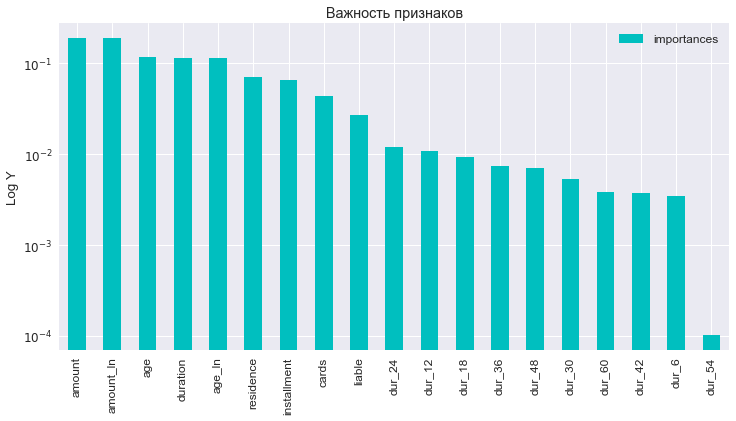

In [97]:
features_real_df =pd.DataFrame(data=importances, index=list(data_feature_selection.columns), columns=['importances'])
features_real_df.sort_values(by='importances', ascending=False, inplace=True)
print (features_real_df.shape[0])
print (features_real_df['importances'][:10])
features_real_df[:50].plot(kind='bar',figsize=(12,6),color='c',logy=True) #sort_columns=True
plt.ylabel("Log Y")
plt.title(u"Важность признаков");

In [98]:
data_feature_selection.drop(['amount','age'],inplace=True,axis=1) # удалим дублирующие столбцы

Сформируем окончательный список признаков по которым будет строится модель

In [99]:
features_real=list(data_feature_selection.columns)
features_final=list(features_cat)+ features_real
len(features_final)

130

In [100]:
del data_feature_selection, features_cat_df, features_cat_df2, features_cat_df3, features_real_df

In [101]:
# сохраним чтобы в дальнейшем уже стартовать с этого места
import pickle
with open('features_final.pkl', 'wb') as fp:
    pickle.dump(features_final, fp)

In [4]:
import pickle
with open ('features_final.pkl', 'rb') as fp:
    features_final = pickle.load(fp)

### Часть 8. Построение модели


Поскольку мы отобрали признаки для построения модели сформируем датасеты для обучения и тестирования моделей

In [103]:
data_final=pd.concat([data[real_features], data_new_real, data_cat,data_cat_conj,data_means_map,data_mean_y], axis=1) \
                      [features_final]
# сохраним чтобы в дальнейшем уже стартовать с этого места
data_final.to_pickle('data_final.pkl')  

In [6]:
data_final = pd.read_pickle('data_final.pkl')

with open ('is_outlier.pkl', 'rb') as fp:
    is_outlier = pickle.load(fp)

In [7]:
X_train=data_final[:700][~is_outlier]
X_test=data_final[700:] 

In [106]:
del data_new_real, data_cat,data_cat_conj,data_means_map, data_mean_y # очистим память

In [8]:
X_train.shape

(693, 130)

In [9]:
y_train= y[:700][~is_outlier] 
y_test= y[700:] 

In [10]:
# features_full тоже подгрузить
features_full = pd.read_pickle('features_full.pkl')

Посмотрим итоговую важность признаков 

In [109]:
from sklearn.ensemble.forest import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000,max_features=25,random_state=7,verbose=1)
model.fit(X_train, y_train)
importances = model.feature_importances_

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.6s finished


130
history_savings_others_it                0.023817
checkingstatus1_savings_foreign_it       0.021302
checkingstatus1_history_savings_it       0.021284
checkingstatus1_employ_others_it         0.019834
checkingstatus1_savings_others_it        0.018337
checkingstatus1_history_others_it        0.017735
purpose_employ_status_it                 0.017031
checkingstatus1_purpose_otherplans_it    0.016878
checkingstatus1_status_property_it       0.015965
history_savings_it                       0.015960
Name: importances, dtype: float64


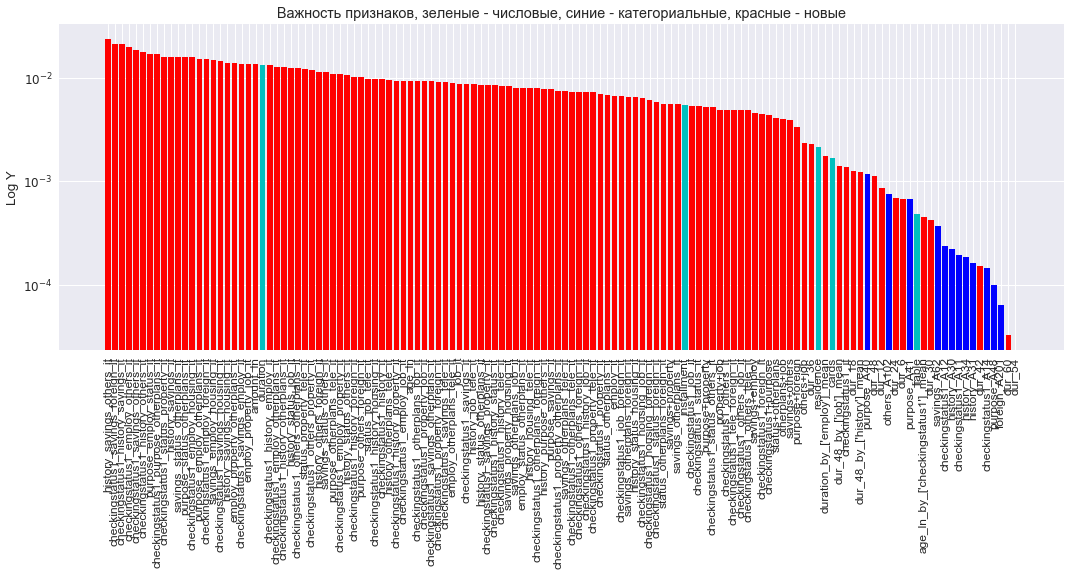

In [110]:
features_full=pd.DataFrame(data=importances, index=list(X_train.columns), columns=['importances'])
features_full.sort_values(by='importances', ascending=False, inplace=True)
print (features_full.shape[0])
print (features_full['importances'][:10])

plt.figure(figsize=(18,6))
n=130
i=0
for f in features_full[:n].index:
    color='r'
    if f in real_features:
        color='c'
    if f in cat_features_:
        color='b'
    plt.bar(i,features_full.ix[f],color=color)
    i+=1

labels=features_full[:n].reset_index()['index'].tolist()    
xticks_pos=[i for i in range(len(features_full[:n]))]    
plt.xticks(xticks_pos,labels,rotation=90) 

plt.yscale('log')
plt.ylabel("Log Y")
plt.title(u"Важность признаков, зеленые - числовые, синие - категориальные, красные - новые");

In [111]:
# сохраним чтобы в дальнейшем уже стартовать с этого места
features_full.to_pickle('features_full.pkl')  

В силу небольшой выборки - количество объектов 1000, такое количество признаков может быть избыточно для определенных классификаторов. Определим оптимальное количество признаков в зависимости от классификатора. Попробуем пять разных моделей классификации.  в качестве метрики качества моделей будем использовать roc_auc_score

**RandomForestClassifier**

In [12]:
%%time
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble.forest import RandomForestClassifier

scores_features=[]
#range_=range(1,20,1)+range(20,len(features_final),5) # Python 2.7
range_=list(range(1,20,1))+list(range(20,len(features_final),5)) # Python 3.5

for n in tqdm(range_):
    scores_features_=cross_val_score(RandomForestClassifier(n_estimators=100,max_features='auto',
                                     random_state=7,verbose=1),\
                                     X_train[features_full.index[:n]], y_train, n_jobs=-1, scoring="roc_auc", cv=5)
    
    scores_features.append(scores_features_)

100%|██████████████████████████████████████████| 41/41 [02:46<00:00,  4.33s/it]


Wall time: 2min 46s


In [15]:
def plot_with_std(x, data, **kwargs):
        mu, std = np.mean(data,axis=1), np.std(data,axis=1)
        lines = plt.plot(x, mu, '-', **kwargs)
        plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                         facecolor=lines[0].get_color(), alpha=0.2)
        plt.xlabel("Количество признаков в модели")
        plt.ylabel("roc auc")
        print("max roc auc : {:0.3f}".format(np.around(np.max(mu),3)))
        print("Количество признаков в модели при max roc auc : {:0.0f}".format(x[np.argmax(mu)]))

max roc auc : 0.822
Количество признаков в модели при max roc auc : 45


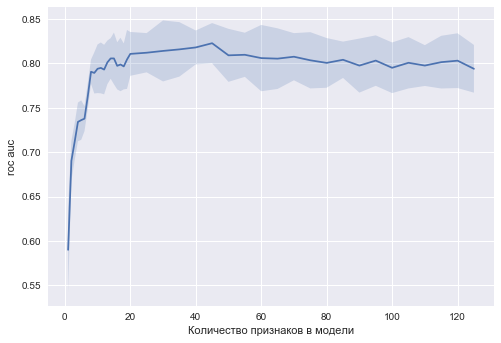

In [17]:
plot_with_std(range_,scores_features)

Существует и болле сложный способ отбора количества признаков через Recursive feature elimination - RFECV

Optimal number of features : 112


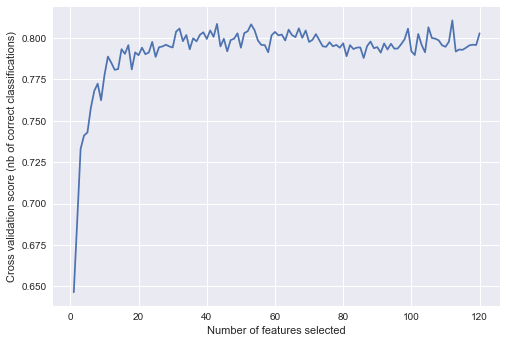

Wall time: 3min 4s


In [49]:
%%time
# https://stackoverflow.com/questions/24123498/recursive-feature-elimination-on-random-forest-using-scikit-learn
#http://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html
from sklearn.feature_selection import RFECV

n_features=120
rf = RandomForestClassifier(n_estimators=100,max_features='auto',random_state=7)
rfecv = RFECV(estimator=rf, step=1, cv=5, scoring='roc_auc')
rfecv.fit(X_train[features_full.index[:n_features]], y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

**GradientBoostingClassifier**

In [23]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
scores_features=[]
for n in tqdm(range_):
    scores_features_=cross_val_score(GradientBoostingClassifier(max_depth=10,n_estimators=100,
                                     random_state=7,verbose=0),\
                                     X_train[features_full.index[:n]], y_train, n_jobs=-1, scoring="roc_auc", cv=5)
    
    scores_features.append(scores_features_)

100%|██████████████████████████████████████████| 41/41 [03:29<00:00,  6.43s/it]


Wall time: 3min 29s


max roc auc : 0.768
Количество признаков в модели при max roc auc : 13


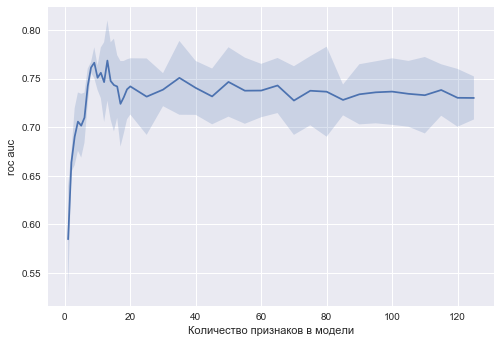

In [24]:
plot_with_std(range_,scores_features)

**KNeighborsClassifier**

In [25]:
%%time
from sklearn.neighbors import KNeighborsClassifier
scores_features=[]
#scaler =MinMaxScaler(feature_range=(0, 1))
#X_train_scaled = scaler.fit_transform(X_train)
# IndexError 
#only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

for n in tqdm(range_):
    scores_features_=cross_val_score(KNeighborsClassifier(n_neighbors=25,n_jobs=-1),\
                    X_train[features_full.index[:n]], y_train, n_jobs=-1, scoring="roc_auc", cv=5)
    
    scores_features.append(scores_features_)

100%|██████████████████████████████████████████| 41/41 [02:26<00:00,  3.62s/it]


Wall time: 2min 26s


max roc auc : 0.792
Количество признаков в модели при max roc auc : 13


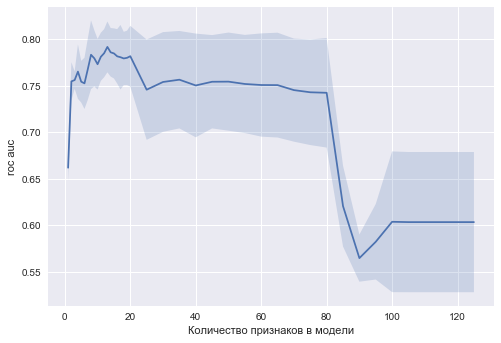

In [26]:
plot_with_std(range_,scores_features)

**LinearSVC**

In [27]:
%%time
from sklearn.svm import LinearSVC
scores_features=[]
for n in tqdm(range_):
    scores_features_=cross_val_score(LinearSVC(C=1.0, multi_class='ovr', random_state=7),\
                                     X_train[features_full.index[:n]], y_train, n_jobs=-1, scoring="roc_auc", cv=5)
    
    scores_features.append(scores_features_)

100%|██████████████████████████████████████████| 41/41 [02:37<00:00,  4.40s/it]


Wall time: 2min 37s


max roc auc : 0.798
Количество признаков в модели при max roc auc : 75


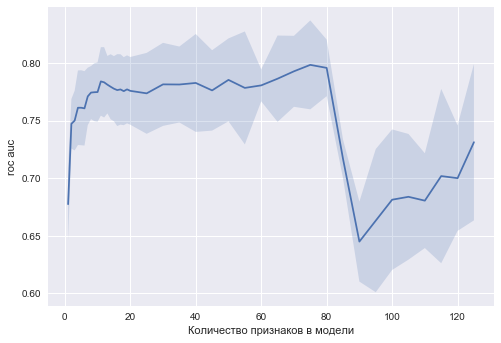

In [28]:
plot_with_std(range_,scores_features)

**LogisticRegression**

In [29]:
%%time
from sklearn.linear_model import LogisticRegression
scores_features=[]
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)

for n in tqdm(range_):
    scores_features_=cross_val_score(LogisticRegression(C=1.0, max_iter=10000, class_weight='balanced',random_state=7 ),\
                     X_train[features_full.index[:n]], y_train, n_jobs=-1, scoring="roc_auc", cv=5)
    
    scores_features.append(scores_features_)

100%|██████████████████████████████████████████| 41/41 [02:35<00:00,  3.90s/it]


max roc auc : 0.814
Количество признаков в модели при max roc auc : 115


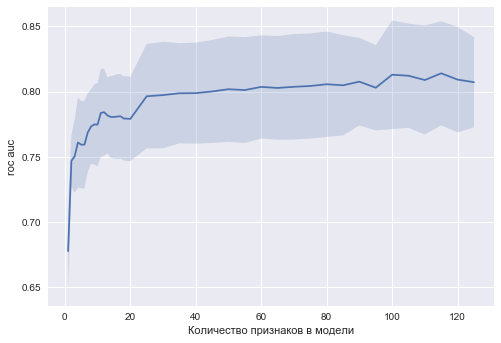

In [30]:
plot_with_std(range_,scores_features)

Отберем количество признаков для настройки моделей:

    RandomForestClassifier - 45 - 0.822
    
    GradientBoostingClassifier - 13 - 0.768
    
    KNeighborsClassifier - 13 - 0.792
    
    LinearSVC - 75- 0.798
    
    LogisticRegression - 115 - 0.815

### Часть 9. Кросс-валидация, подбор параметров

Подберем оптимальные параметры моделей. Отберем лучшие модели

In [14]:
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_score

**RandomForestClassifier**

In [16]:
%%time
from sklearn.ensemble.forest import RandomForestClassifier
scores_model=[]
n_features=45
range_= range(2,25,1)
for depth in tqdm(range_):
    scores_model_=cross_val_score(RandomForestClassifier(max_depth=depth, n_estimators=100,max_features='auto',
                            random_state=7,verbose=1),\
                            X_train[features_full.index[:n_features]], y_train, n_jobs=-1, scoring="roc_auc", cv=5)
    scores_model.append(scores_model_)

100%|██████████████████████████████████████████| 23/23 [01:36<00:00,  4.23s/it]


Wall time: 1min 36s


In [17]:
def plot_with_std(x, data,name_model ,**kwargs):
        mu, std = np.mean(data,axis=1), np.std(data,axis=1)
        lines = plt.plot(x, mu, '-', **kwargs)
        plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                         facecolor=lines[0].get_color(), alpha=0.2)
        plt.xlabel("Значение параметра " + name_model )
        plt.ylabel("roc auc")
        print("max roc auc : {:0.3f}".format(np.around(np.max(mu),3)))   
        print("Значение параметра " + name_model  + " при max roc auc : {:0.0f}".format(x[np.argmax(mu)]))

max roc auc : 0.822
Значение параметра max_depth RandomForestClassifier при max roc auc : 19


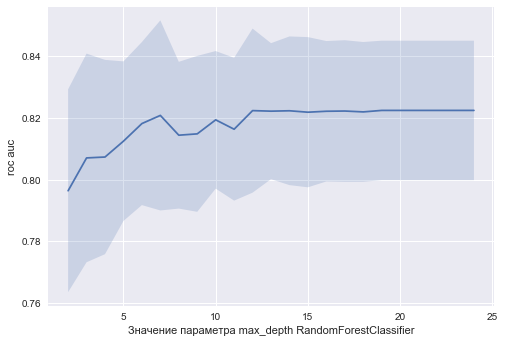

In [18]:
plot_with_std(range_,scores_model,"max_depth RandomForestClassifier")

**GradientBoostingClassifier**

In [19]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
scores_model=[]
n_features=13
range_= range(2,25,1)
for depth in tqdm(range_):
    scores_model_=cross_val_score(GradientBoostingClassifier(max_depth=depth,n_estimators=100,
                            random_state=7,verbose=0),\
                            X_train[features_full.index[:n_features]], y_train, n_jobs=-1, scoring="roc_auc", cv=5)
    
    scores_model.append(scores_model_)

100%|██████████████████████████████████████████| 23/23 [01:39<00:00,  4.31s/it]


Wall time: 1min 39s


max roc auc : 0.815
Значение параметра max_depth GradientBoostingClassifier при max roc auc : 2


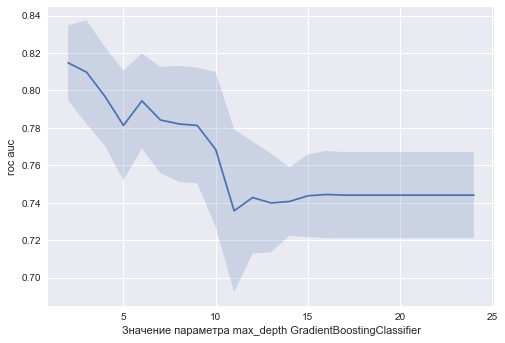

In [20]:
plot_with_std(range_, scores_model,"max_depth GradientBoostingClassifier")

GradientBoostingClassifier имеет большое количество настраиваемых параметров. Попробуем более подробно поперебирать параметры, чтобы поискать лучшую модель

In [23]:
%%time
# project_example_banks
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

gbm_params = { 'n_estimators': [100, 300, 500],
               'learning_rate':(0.1, 0.5, 1),
                'max_depth': list(range(2, 6)), 
               'min_samples_leaf': list(range(10, 31, 5))}

# Проводим кросс-валидацию 
grid = GridSearchCV(GradientBoostingClassifier(), gbm_params, 
                    cv=StratifiedKFold(y_train, n_folds=5,
                    shuffle=False, random_state=7), 
                    n_jobs=-1, scoring="roc_auc")

grid.fit(X_train[features_full.index[:n_features]], y_train)
print('GradientBoostingClassifier', grid.best_score_ , "\n", grid.best_params_)

GradientBoostingClassifier 0.8202840823796523 
 {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 10, 'n_estimators': 100}
Wall time: 1min 34s


**KNeighborsClassifier**

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
n_features=13
X_scaled = scaler.fit_transform(X_train[features_full.index[:n_features]])

In [26]:
%%time
from sklearn.neighbors import KNeighborsClassifier
scores_model=[]
neighb = np.arange(1,76,1)
for n in tqdm(neighb):
    scores_model_ = cross_val_score(KNeighborsClassifier(n_neighbors=n),X_scaled, y_train, n_jobs=-1,
                            scoring="roc_auc", cv=5)
    scores_model.append(scores_model_)

100%|██████████████████████████████████████████| 75/75 [04:17<00:00,  3.43s/it]


Wall time: 4min 17s


max roc auc : 0.793
Значение параметра  n KNeighborsClassifier при max roc auc : 25


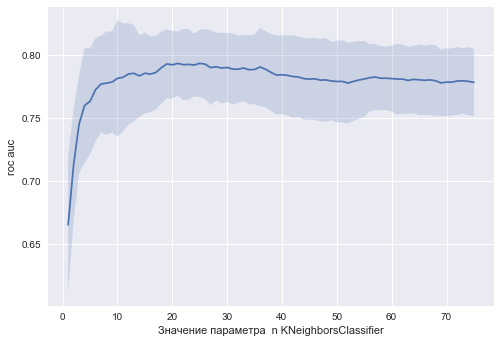

In [27]:
plot_with_std(neighb, scores_model," n KNeighborsClassifier")

**LinearSVC**

In [28]:
%%time
from sklearn.svm import LinearSVC
scores_model=[]
n_features=75
degrees = np.arange(-10., 2., 0.25)
for deg in degrees:
    scores_model_= cross_val_score(LinearSVC(C=10 ** deg, random_state=7), 
                            X_train[features_full.index[:n_features]], y_train, n_jobs=-1,verbose=1,
                            scoring="roc_auc", cv=5)
    scores_model.append(scores_model_)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Paral

Wall time: 3min 4s


max roc auc : 0.802
Значение параметра  С LinearSVC  при max roc auc : -0


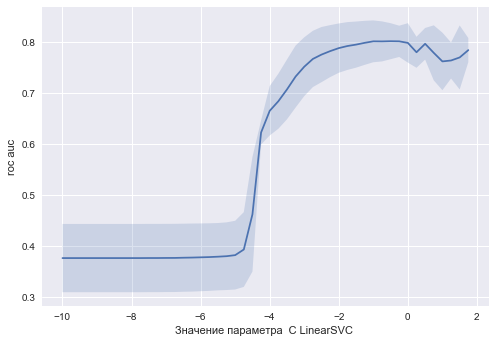

In [29]:
plot_with_std(degrees, scores_model," С LinearSVC ")

**LogisticRegression**

In [30]:
%%time
from sklearn.linear_model import LogisticRegression
scores_model=[]
n_features=115
degrees = np.arange(-10., 10., 0.25)
for deg in degrees:
    scores_model_= cross_val_score(LogisticRegression(C=10 ** deg, max_iter=10000, class_weight='balanced',random_state=7), 
                            X_train[features_full.index[:n_features]], y_train, n_jobs=-1,verbose=1,
                            scoring="roc_auc", cv=5)
    scores_model.append(scores_model_)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Paral

Wall time: 5min 39s


max roc auc : 0.828
Значение параметра  LogisticRegression  при max roc auc : 2


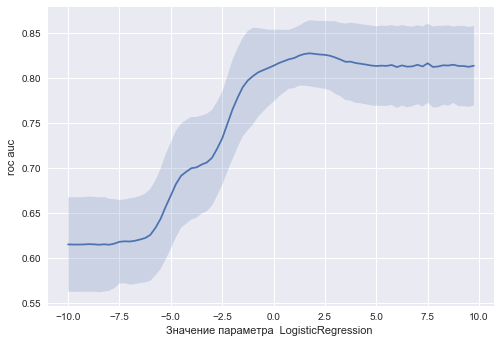

In [31]:
plot_with_std(degrees, scores_model," LogisticRegression ")

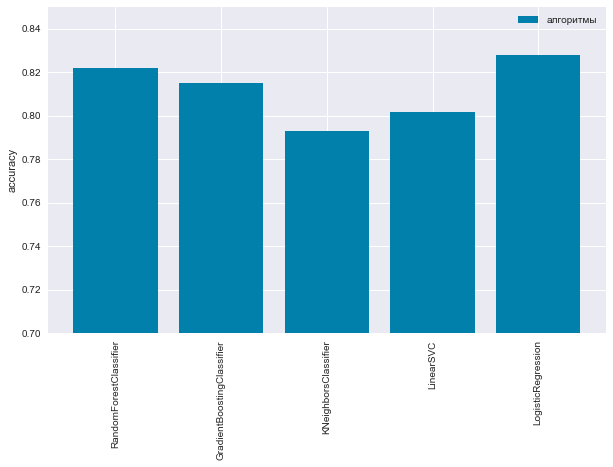

In [32]:
tmp = [('RandomForestClassifier', 0.822),
       ('GradientBoostingClassifier', 0.815),
       ('KNeighborsClassifier', 0.793),
       ('LinearSVC', 0.802),
       ('LogisticRegression', 0.828)]

xticks = [x[0] for x in tmp]
accuracy = [x[1] for x in tmp]

plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(accuracy)), accuracy, color='#0080AA', label=u'алгоритмы')
plt.xticks(np.arange(len(accuracy)), xticks, rotation=90)

#plt.xlim([0, 4])
plt.ylim([0.7, 0.85])
plt.ylabel('accuracy')
plt.legend(loc=1);

RandomForestClassifier, GradientBoostingClassifier, LinearSVC и LogisticRegression будем использовать дальше при смешивании классификаторов (blending) и постороении классификатора над другими классификаторами (stacking)

### Часть 10. Построение кривых валидации и обучения

In [34]:
from sklearn.learning_curve import validation_curve
from sklearn.learning_curve import learning_curve

In [35]:
def plot_with_std(x, data, **kwargs):
        mu, std = data.mean(1), data.std(1)
        lines = plt.plot(x, mu, '-', **kwargs)
        plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                         facecolor=lines[0].get_color(), alpha=0.2)

def plot_learning_curve(clf, X, y, scoring, cv=5):
 
    train_sizes = np.linspace(0.05, 1, 20)
    n_train, val_train, val_test = learning_curve(clf, X, y, train_sizes, cv=cv, scoring=scoring)
    
    plt.figure(figsize=(12,6))
    plot_with_std(n_train, val_train, label='training scores', c='green')
    plot_with_std(n_train, val_test, label='validation scores', c='red')    
    plt.xlabel('Training Set Size');     
    plt.ylabel(scoring)
    plt.legend()

def plot_validation_curve(clf, X, y, cv_param_name, 
                          cv_param_values, scoring):

    val_train, val_test = validation_curve(clf, X, y, cv_param_name, cv_param_values, cv=5, scoring=scoring)
    
    plt.figure(figsize=(12,6))
    plot_with_std(cv_param_values, val_train, 
                  label='training scores', c='green')
    plot_with_std(cv_param_values, val_test, 
                  label='validation scores', c='red')   
    plt.xlabel(cv_param_name);     
    plt.ylabel(scoring)
    plt.legend()

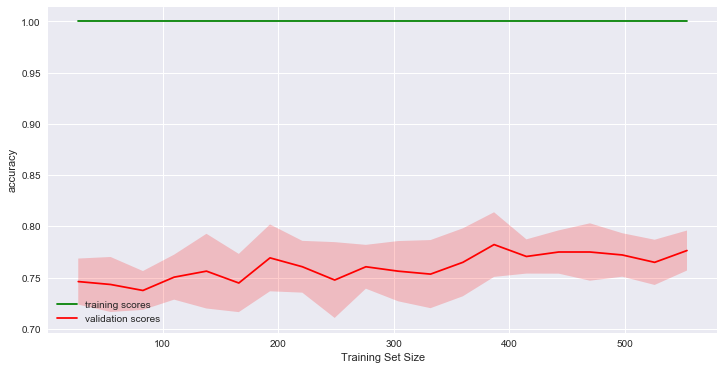

In [50]:
# Кривая обучения
# при scoring='roc_auc' --> AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'
# RandomForestClassifier  имеет вместо этого -  oob_decision_function_, чтобы не перерисывать learning_curve
# простроим кривую обучения для scoring='accuracy'

n_features=45
plot_learning_curve(RandomForestClassifier(max_depth=20, n_estimators=100,max_features='auto',random_state=7),
                   X_train[features_full.index[:n_features]], y_train, scoring='accuracy', cv=5)

In [1]:
# https://habrahabr.ru/company/ods/blog/323890/#5-krivye-validacii-i-obucheniya

Поскольку объем данных ограничен, разумно поварьировать размер имеющейся обучающей выборки и посмотреть, как качество решения задачи зависит от объема данных, на котором мы обучали модель. Так получаются кривые обучения (learning curves).
На полученой кривой обучения видно, что оценка обучения находится на максимальном уровне. В текущем датасете нам явно не хватает данных для обучения. Хорошая тенденция, когда кривые постепенно сходятся, и если добавлять в модель данные, можно дальше повышать качество на валидации.

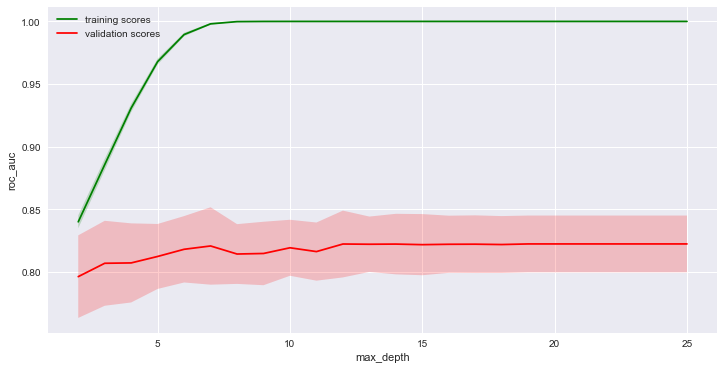

In [41]:
# Кривая валидации
depth= np.linspace(2, 25, 24)
plot_validation_curve(RandomForestClassifier( n_estimators=100,max_features='auto',random_state=7),
                    X_train[features_full.index[:n_features]], y_train, 
                    cv_param_name='max_depth', 
                    cv_param_values=depth,
                    scoring='roc_auc')

In [51]:
# https://habrahabr.ru/company/ods/blog/324402/

Как видно, при достижении определенного числа деревьев roc auc  выходит на асимптоту, и можно понять, сколько деревьев оптимально для задачи

### Часть 11 . Различные стратегии сэмплинга 

In [52]:
# https://basegroup.ru/community/articles/imbalance-datasets

Для кредитного скоринга характерна ситуация когда доля примеров одного класса (дефолтов) мала, а другого велика. Больший класс принято называть мажоритарным, меньший миноритарным. Построенные на таких данных классификаторы  могут быть неэффективными.

Неверная классификация примеров миноритарного класса, как правило, обходится в разы дороже, чем ошибочная классификация примера мажоритарного класса.Одним из подходов для решения указанной проблемы является применение различных стратегий сэмплинга, которые можно разделить на две группы: случайные и специальные.

Восстановление баланса классов может проходить двумя путями. В первом случае удаляют некоторое количество примеров мажоритарного класса (undersampling), во втором – увеличивают количество примеров миноритарного (oversampling)

Для сэмплирования будем пользоваться готовой библиотекой - imbalanced-learn

http://contrib.scikit-learn.org/imbalanced-learn/index.html

In [53]:
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

** RandomUnderSampler **

In [54]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
rus = RandomUnderSampler(random_state=7 )
X_res, y_res = rus.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 490, 1: 203})
Resampled dataset shape Counter({1: 203, 0: 203})


Такого объема данных может не хватить чтобы хорошо обучиться. Посмотрим какой accuracy_score получим на лучшей модели RandomForestClassifier

In [68]:
# http://contrib.scikit-learn.org/imbalanced-learn/api.html?highlight=imblearn%20under_sampling#module-imblearn.under_sampling
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.ensemble.forest import RandomForestClassifier 

n_features = 35
depth = 18
scores_model=[]
range_= range(2,25,1)

for depth in tqdm(range_):
    pipeline = make_pipeline(RandomUnderSampler(random_state=7),
                        RandomForestClassifier(max_depth=depth, n_estimators=100,max_features='auto', random_state=7))   
    
    scores_model_=cross_val_score(pipeline,\
                            X_train[features_full.index[:n_features]], y_train, n_jobs=-1, scoring="roc_auc", cv=5)
    scores_model.append(scores_model_)

100%|██████████████████████████████████████████| 23/23 [01:40<00:00,  4.39s/it]


In [69]:
def plot_with_std(x, data,name_model ,**kwargs):
        mu, std = np.mean(data,axis=1), np.std(data,axis=1)
        lines = plt.plot(x, mu, '-', **kwargs)
        plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                         facecolor=lines[0].get_color(), alpha=0.2)
        plt.xlabel("Значение параметра " + name_model )
        plt.ylabel("roc auc")
        print("max roc auc : {:0.3f}".format(np.around(np.max(mu),3)))   
        print("Значение параметра " + name_model  + " при max roc auc : {:0.0f}".format(x[np.argmax(mu)]))

max roc auc : 0.808
Значение параметра max_depth RandomForestClassifier при max roc auc : 7


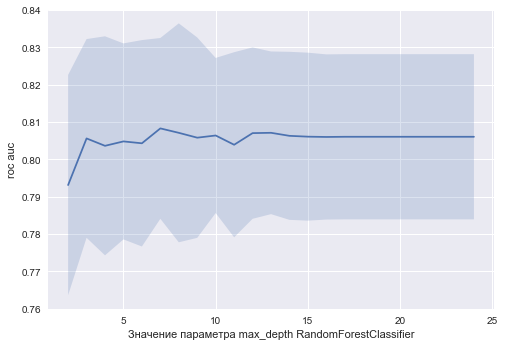

In [70]:
plot_with_std(range_,scores_model,"max_depth RandomForestClassifier")

**CondensedNearestNeighbour**

In [71]:
from imblearn.under_sampling import CondensedNearestNeighbour 
print('Original dataset shape {}'.format(Counter(y_train)))
cnn = CondensedNearestNeighbour(random_state=7)
X_res, y_res = cnn.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 490, 1: 203})
Resampled dataset shape Counter({0: 249, 1: 203})


In [72]:
scores_model=[]
for depth in tqdm(range_):
    pipeline = make_pipeline(CondensedNearestNeighbour (random_state=7),
                        RandomForestClassifier(max_depth=depth, n_estimators=100,max_features='auto', random_state=7))   
    
    scores_model_=cross_val_score(pipeline,\
                            X_train[features_full.index[:n_features]], y_train, n_jobs=-1, scoring="roc_auc", cv=5)
    scores_model.append(scores_model_)

100%|██████████████████████████████████████████| 23/23 [02:08<00:00,  5.54s/it]


max roc auc : 0.809
Значение параметра max_depth RandomForestClassifier при max roc auc : 5


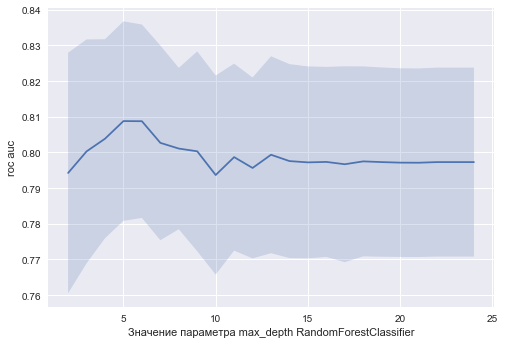

In [73]:
plot_with_std(range_,scores_model,"max_depth RandomForestClassifier")

** RandomOverSampler**

In [74]:
from imblearn.over_sampling import  RandomOverSampler 
print('Original dataset shape {}'.format(Counter(y_train)))
ros = RandomOverSampler(random_state=7)
X_res, y_res = ros.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 490, 1: 203})
Resampled dataset shape Counter({0: 490, 1: 490})


In [75]:
scores_model=[]
for depth in tqdm(range_):
    pipeline = make_pipeline(RandomOverSampler (random_state=7),
                        RandomForestClassifier(max_depth=depth, n_estimators=100,max_features='auto', random_state=7))   
    
    scores_model_=cross_val_score(pipeline,\
                            X_train[features_full.index[:n_features]], y_train, n_jobs=-1, scoring="roc_auc", cv=5)
    scores_model.append(scores_model_)

100%|██████████████████████████████████████████| 23/23 [01:40<00:00,  4.73s/it]


max roc auc : 0.823
Значение параметра max_depth RandomForestClassifier при max roc auc : 5


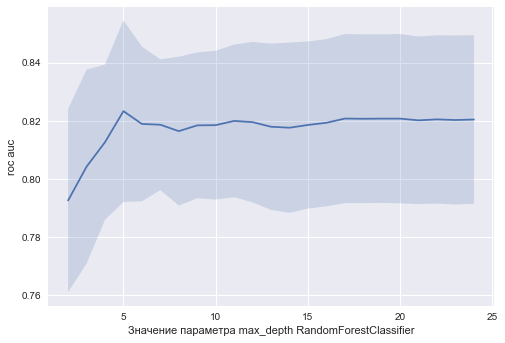

In [76]:
plot_with_std(range_,scores_model,"max_depth RandomForestClassifier")

** SMOTE **

In [77]:
from imblearn.over_sampling import SMOTE 
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=7)
X_res, y_res = sm.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 490, 1: 203})
Resampled dataset shape Counter({0: 490, 1: 490})


In [78]:
scores_model=[]
for depth in tqdm(range_):
    pipeline = make_pipeline(SMOTE (random_state=7),
                        RandomForestClassifier(max_depth=depth, n_estimators=100,max_features='auto', random_state=7))   
    
    scores_model_=cross_val_score(pipeline,\
                            X_train[features_full.index[:n_features]], y_train, n_jobs=-1, scoring="roc_auc", cv=5)
    scores_model.append(scores_model_)

100%|██████████████████████████████████████████| 23/23 [01:39<00:00,  4.36s/it]


max roc auc : 0.816
Значение параметра max_depth RandomForestClassifier при max roc auc : 10


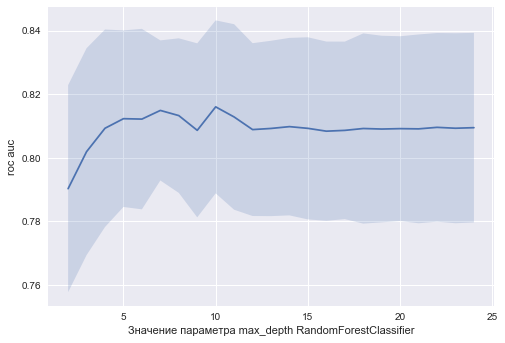

In [79]:
plot_with_std(range_,scores_model,"max_depth RandomForestClassifier")

Заметно, что лучшие результаты на тренировочной выборке дают стратегии сэмплирования которые добавляют примером в миноритарный класс. Это можно объяснить тем, что при удалении примеров мажаритарного класса мы теряем в объеме выборки, и как следствие нам не хватает данных для обучения. Лучший результат показала стратегия случайного дублирования примеров миноритарного класса - RandomOverSampler. Но её результат  показанный для cross_val_score accuracy = 0.823 , не так сильно выше результата без сэмплирования  cross_val_score roc_auc = 0.822. Как результат от сэмплирования  классов решено отказаться, по всей видимости пропорция классов 7:3 не является в нашем случае критично несбалансированной.

Оставим  пропорцию между классами как есть, поскольку алгоритмы  сэмплинга несбалансированных классов в нашем случае не улучшают результат

### Часть 12. Прогноз для тестовой выборки

In [152]:
# https://github.com/glebmikha/ipython_notebooks/blob/master/default_prediction.ipynb

rf = RandomForestClassifier(max_depth=20, n_estimators=100,max_features='auto',random_state=7,verbose=1)
gbm_params = {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 10, 'n_estimators': 100}
gb = GradientBoostingClassifier(**gbm_params)    
knn = KNeighborsClassifier(n_neighbors=25)
svc = LinearSVC(C=10 **(-1), random_state=7)
lr = LogisticRegression(C=10 ** 2, max_iter=10000, class_weight='balanced',random_state=7)

models = []
models.append(rf)
models.append(gb)
models.append(knn)
models.append(svc) # 'LinearSVC' object has no attribute 'predict_proba'
models.append(lr)

n_features_list=[45,13,13,75,115]

for model, n_features in zip(models,n_features_list):
    model.fit(X_train[features_full.index[:n_features]], y_train)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [153]:
from sklearn.metrics import roc_curve
# !pip install ml_metrics
import ml_metrics

def roc_comparison(models, X_test, y_test,n_features_list):
    plt.figure(figsize=(10, 10))     
    
    for model, n_features in zip(models,n_features_list):
        if model==svc:     #'LinearSVC' object has no attribute 'predict_pr
            pred_scr = model.predict(X_test[features_full.index[:n_features]]) 
        else:    
            pred_scr = model.predict_proba(X_test[features_full.index[:n_features]])[:, 1]
            
        fpr, tpr, thresholds = roc_curve(np.array(y_test), pred_scr)
        #roc_auc = ml_metrics.auc(np.array(y_test), pred_scr)
        roc_auc = roc_auc_score(np.array(y_test), pred_scr)
        md = str(model)
        md = md[:md.find('(')]        
        plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.3f)' % (md, roc_auc))
        

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


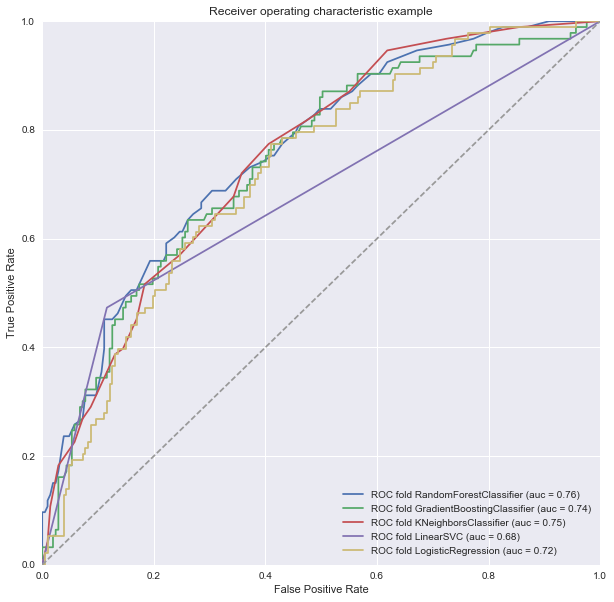

In [144]:
roc_comparison(models, X_test, y_test, n_features_list)

Лучшая модель на тестовой выборке RandomForestClassifier - roc_auc 0.76

***Блендинг и стекинг не являются техниками используемыми в банковском скоринге, поскольку добавляют к общей оценке лучшего классификатора не более чем во 2 знаке после запятой. Реализовано для демострации работы с этими техниками***

### Часть 13. Блендинг. Смешивание классификаторов

Попробуем увеличить качество модели путем смешивания нескольких классификаторов. Кросс-валидацию будем проводить чтобы получить в том числе out_of_fold оценки целевой переменной

In [149]:
# lesson5_practice_churn_blending_rf_xgboost_solution
# https://www.kaggle.com/general/18793
def out_of_fold_prediction(clf, train_df, y_series, folds, scale=False):
    
    prediction = y_series.copy()
    for train_idx, test_idx in folds:
        X_train, X_test = train_df.iloc[train_idx, :], train_df.iloc[test_idx,:]
        y_train, y_test = y_series.iloc[train_idx], y_series.iloc[test_idx]
        
        if scale:
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
        
        clf.fit(X_train, y_train)        
        prediction.iloc[test_idx] = clf.predict_proba(X_test)[:, 1]        
    return(prediction)

Будем смешивать следующие классификаторы RandomForestClassifier, GradientBoostingClassifier и KNeighborsClassifier

In [172]:
folds = StratifiedKFold(y_train, n_folds=5, random_state=7)
# будем смешивать RandomForestClassifier, GradientBoostingClassifier и KNeighborsClassifier
n_features=45
rf_oof_pred = out_of_fold_prediction(rf, X_train[features_full.index[:n_features]], y_train, folds)
print('CV RandomForestClassifier : {0} '.format(round(roc_auc_score(y_train, rf_oof_pred), 4)))

n_features=13
gb_oof_pred = out_of_fold_prediction(gb, X_train[features_full.index[:n_features]], y_train, folds)
print('CV GradientBoostingClassifier: {0} '.format(round(roc_auc_score(y_train, gb_oof_pred), 4)))

n_features=13
knn_oof_pred = out_of_fold_prediction(knn, X_train[features_full.index[:n_features]], y_train, folds, scale=True)
print('CV KNeighborsClassifier: {0} '.format(round(roc_auc_score(y_train, knn_oof_pred), 4)))

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


CV RandomForestClassifier : 0.8213 
CV GradientBoostingClassifier: 0.8192 
CV KNeighborsClassifier: 0.7898 


In [209]:
def best_linear_mix(target, pred1, pred2, pred3,metric=roc_auc_score):
    best_metric, best_w1,  best_w2 = 0, 0, 0
    for w1 in np.linspace(0, 1, 50):
          for w2 in np.linspace(0, 1-w1, 5):        
            curr_pred = (w1 * pred1 +  w2 * pred2 + (1 - w1 - w2) * pred3 )
            curr_metric = metric(target, curr_pred)
            if curr_metric > best_metric:
                best_metric = curr_metric
                best_pred = curr_pred
                best_w1 = w1
                best_w2 = w2
            # print (w1, w2, w1+w2)
                
    return best_metric, best_pred, best_w1, best_w2

In [210]:
best_auc, best_pred, best_w1, best_w2 = best_linear_mix(y_train, rf_oof_pred, gb_oof_pred, knn_oof_pred)

In [211]:
 print("out_of_fold roc auc смешанной модели : {:0.3f}".format(np.around(np.max(best_auc),4)))

out_of_fold roc auc смешанной модели : 0.828


In [212]:
round(best_w1, 2),round(best_w2, 2)

(0.63, 0.37)

In [218]:
n_features=45
rf_pred_scr = rf.predict_proba(X_test[features_full.index[:n_features]])[:, 1]
n_features=13
gb_pred_scr = gb.predict_proba(X_test[features_full.index[:n_features]])[:, 1]

rf_gb_knn = best_w1 * rf_pred_scr +  best_w2 * gb_pred_scr  #(1 - best_w1 - best_w2) * knn_pred_scr равно ноль
print(round(roc_auc_score(y_test, rf_gb_knn), 3))

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.755


Смешивание трех классификаторов на тестовой выборке не дает прироста качества модели

         _______________________________________
         |  ROC AUC    | Out-of-fold |  Test   |
         |_____________|_____________|_________|
         | RF          |   .822      |  .760   |
         | GB          |   .815      |  .740   |
         | RF+GB+Knn   |   .828      |  .755   |
         |_____________|_____________|_________|

### Часть 14. Стэкинг. Построение классификатора над другими классификаторами

In [221]:
# https://github.com/Dyakonov/ml_hacks/blob/master/dj_stacking.ipynb
# https://alexanderdyakonov.wordpress.com/2017/03/10/c%D1%82%D0%B5%D0%BA%D0%B8%D0%BD%D0%B3-stacking-%D0%B8-%D0%B1%D0%BB%D0%B5%D0%BD%D0%B4%D0%B8%D0%BD%D0%B3-blending/

In [222]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

class DjStacking(BaseEstimator, ClassifierMixin):  
    """Стэкинг моделей scikit-learn"""

    def __init__(self, models, ens_model):
        """
        Инициализация
        models - базовые модели для стекинга
        ens_model - мета-модель
        """
        self.models = models
        self.ens_model = ens_model
        self.n = len(models)
        self.valid = None
        
    def fit(self, X, y=None, p=0.25, cv=3, err=0.001, random_state=None):
        """
        Обучение стекинга
        p - в каком отношении делить на обучение / тест
            если p = 0 - используем всё обучение!
        cv  (при p=0) - сколько фолдов использовать
        err (при p=0) - величина случайной добавки к метапризнакам
        random_state - инициализация генератора
            
        """
        if (p > 0): # делим на обучение и тест
            # разбиение на обучение моделей и метамодели
            train, valid, y_train, y_valid = train_test_split(X, y, test_size=p, random_state=random_state)
            
            # заполнение матрицы для обучения метамодели
            self.valid = np.zeros((valid.shape[0], self.n))
            for t, clf in enumerate(self.models):
                clf.fit(train, y_train)
                self.valid[:, t] = clf.predict(valid)
                
            # обучение метамодели
            self.ens_model.fit(self.valid, y_valid)
            
        else: # используем всё обучение            
            # для регуляризации - берём случайные добавки
            self.valid = err*np.random.randn(X.shape[0], self.n)
            
            for t, clf in enumerate(self.models):
                # это oob-ответы алгоритмов
                self.valid[:, t] += cross_val_predict(clf, X, y, cv=cv, n_jobs=-1, method='predict')
                # но сам алгоритм надо настроить
                clf.fit(X, y)
            
            # обучение метамодели
            self.ens_model.fit(self.valid, y)              

        return self    


    def predict(self, X, y=None):
        """
        Работа стэкинга
        """
        # заполение матрицы для мета-классификатора
        X_meta = np.zeros((X.shape[0], self.n))
        
        for t, clf in enumerate(self.models):
            X_meta[:, t] = clf.predict(X)
        
        a = self.ens_model.predict(X_meta)
        
        return (a)

** Базовые алгоритмы и мета алгоритм **

В качестве базовых алгоритмов будем использовать теже алгоритмы которые использовались для блендинга классификаторов - RandomForestClassifier, GradientBoostingClassifier и KNeighborsClassifier, в качестве мета-алгоритма - Ridge классификатор

In [225]:
def score_st(clf, X, y, label):
    a = clf.predict(X)   
    print (label + ' roc auc  = ' + str( roc_auc_score(y, a) ))

In [350]:
rf = RandomForestClassifier(max_depth=20, n_estimators=100,max_features='auto',random_state=7)
gbm_params = {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 10, 'n_estimators': 100}
gb = GradientBoostingClassifier(**gbm_params)    
knn = KNeighborsClassifier(n_neighbors=25)

n_features=45
X_train_st = X_train[features_full.index[:n_features]]
rf.fit(X_train_st, y_train)
gb.fit(X_train_st, y_train)
knn.fit(X_train_st, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [351]:
from sklearn.linear_model import Ridge
from sklearn import svm

models = [rf,gb,knn] 
ens_model = Ridge()  #svm.SVC(gamma=.2) #LinearSVC() #Ridge()
X_test_st =  X_test[features_full.index[:n_features]]


s1 = DjStacking(models, ens_model)
s1.fit(X_train_st, y_train)
score_st(s1, X_test_st, y_test, '1-stacking')

s2 = DjStacking(models, ens_model)
s2.fit(X_train_st, y_train, p=-1)
score_st(s2, X_test_st, y_test, '2-stacking')

1-stacking roc auc  = 0.680562048725
2-stacking roc auc  = 0.736195522311


In [368]:
ens_model = Ridge(0.001)
s3 = DjStacking(models, ens_model)
a = 0
e = []
for t in range(20):
    s3.fit(X_train_st, y_train, p=0.75) # p - в каком отношении делить на обучение / тест
    a += s3.predict(X_test_st, y_test)
    
    auc = roc_auc_score(y_test, a)
    print (auc)
    e.append(auc)

0.647031323048
0.741078385538
0.763752532336
0.766401745364
0.767986078645
0.766609526778
0.766609526778
0.764453794608
0.765648537738
0.764609630669
0.766142018596
0.764765466729
0.763155160771
0.765804373799
0.762791543296
0.762973352034
0.76076567451
0.762635707236
0.761389018752
0.760713729157


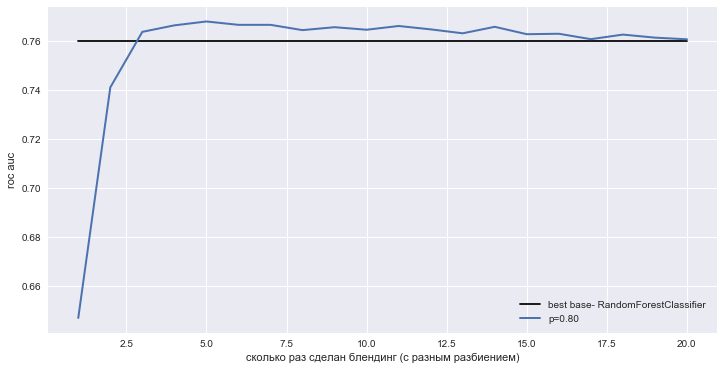

In [369]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1,21), 0.76 + 0*np.arange(1,21), c='black', label='best base- RandomForestClassifier ')
plt.plot(np.arange(1,21), e, label='p=0.75', lw=2)
plt.xlabel(u'сколько раз сделан блендинг (с разным разбиением)')
plt.ylabel('roc auc')
plt.legend();

При использовании стэкинга тренировочная выборка разделяется на две части - для обучения базовых алгоритмов, для обучения мета-алгоритма которому на вход подаются результаты базовых алгоритмов. В результате базовые алгоритмы обучаются на меньшей части выборки, чем если бы не использовался стэкинг. В текущей задаче на кривой обучения видно, что данных для обучения недостаточно и уменьшение данных для обучения базовых классификаторов может не способствоват росту метрики качества. 
Тем не менее в результате стекинга оценка roc auc превысила оценку лучшей модели.

###  Индекс стабильности популяции

Одним из важнейших показателей эффективности скоринговой карты является не только ее прогностическая точность, но и отсутствие значительных изменений в профиле аппликанта на протяжении ее построения. Если построение скоринговой карты длится достаточно долго, в кредитном портфеле могут произойти значимые изменения. Поскольку такие изменения не отражаются в исходных данных, которые были использованы для разработки скоринговой карты (обучающая выборка), то необходимо убедиться в том, что качество скоринговой карты не изменилось. А если изменилось, то необходимо учесть такие отклонения. Для решения этих задач проводится фронт-энд валидация.

В ходе фронт-энд валидации используется новая скоринговая карта и сравнивается распределение аппликантов в текущей выборке (фактический входящий поток) с распределением аппликантов в обучающей выборке (ожидаемое распределение). Обычно выполняется скоринг последних клиентов. Однако хорошей практикой является последовательный анализ по нескольким последним периодам времени (последний месяц, последние три месяца, последние шесть месяцев и т.д.), чтобы обнаружить любые появляющиеся тренды или подтвердить предположение о том, что изменения, выявленные за отдельно взятый месяц, не являются долгосрочным трендом.
Обычно для этого подготавливают отчеты «Стабильность системы». Ключевой показатель в отчете - индекс стабильности популяции (PSI).

In [11]:
from sklearn.ensemble.forest import RandomForestClassifier
rf = RandomForestClassifier(max_depth=20, n_estimators=100,max_features='auto',random_state=7)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)

In [12]:
actual = list(y)
expected = rf.predict_proba(data_final)[:, 1]

In [13]:
step=100
actual_bin,expected_bin,index_bin =[],[],[]

for i in range(0,1000,step):    
    actual_bin.append( sum(actual[i:i+step]) )
    expected_bin.append( sum(expected[i:i+step]) )
    index_bin.append(str(i)+' - '+str(i+step))

In [14]:
# http://ucanalytics.com/blogs/population-stability-index-psi-banking-case-study/

psi_df=pd.DataFrame(list(zip(actual_bin,expected_bin)),columns=['Actual','Expected'],index=index_bin)
psi_df[' Ac - Ex ']=psi_df['Actual']-psi_df['Expected']
psi_df[' ln(Ac/Ex) ']=log(psi_df['Actual']/psi_df['Expected'])
psi_df[' Index ']=psi_df[' ln(Ac/Ex) ']*psi_df[' ln(Ac/Ex) ']*0.01
psi_df

,Actual,Expected,Ac - Ex,ln(Ac/Ex),Index
0 - 100,25,27.3625,-2.3625,-0.090298,8.153663e-05
100 - 200,32,31.6600,0.3400,0.010682,1.141019e-06
200 - 300,23,23.8900,-0.8900,-0.037966,1.441398e-05
300 - 400,28,29.3700,-1.3700,-0.047769,2.281900e-05
400 - 500,28,27.9225,0.0775,0.002772,7.682292e-08
500 - 600,41,37.4325,3.5675,0.091033,8.286963e-05
600 - 700,30,30.0125,-0.0125,-0.000417,1.735388e-09
700 - 800,32,28.8600,3.1400,0.103279,1.066662e-04
800 - 900,29,28.3000,0.7000,0.024434,5.970216e-06
900 - 1000,32,30.7900,1.2100,0.038546,1.485790e-05


In [15]:
psi_df[' Index '].sum()

0.0003303531656041654

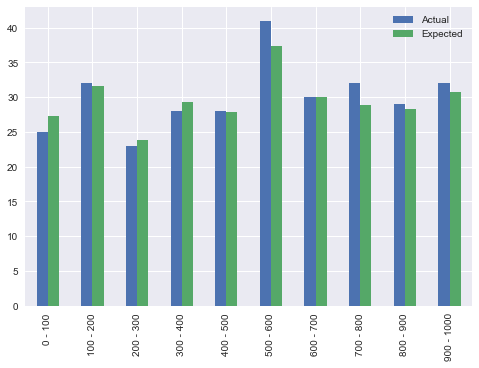

In [16]:
psi_df[['Actual','Expected']].plot(kind='bar');